In [46]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
import numpy as np
from tensorflow.keras.losses import categorical_crossentropy
from keras.constraints import MaxNorm
from keras.metrics import AUC
from tensorflow.keras import regularizers
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter

### Loading Breast Cancer dataset

In [90]:
dmatrix = pd.read_csv('/tf/Classification/Data/BRCA/VII_Sem_Data/dm_red.csv',index_col=0)
dframe = pd.read_csv('/tf/Classification/Data/BRCA/VII_Sem_Data/df_red.csv',index_col=0)

dmatrix = dmatrix.transpose().astype('float64')

dframe.set_index("barcode", inplace=True)
dframe = dframe.loc[dmatrix.index]
dframe.loc[dframe["subtype_PAM50.mRNA"].isna(), "subtype_PAM50.mRNA"] = "No Cancer"
dframe["pam50"], mapping = pd.factorize(dframe["subtype_PAM50.mRNA"])
coded_categories = np.unique(dframe["pam50"])
mapping_dict = {}
count = 0
for i in mapping:
    mapping_dict[i] = count
    count += 1

dmatrix.head()

AADAC      AOC1     ACADL     ASIC2  \
TCGA-BH-A1FH-11B-42R-A13Q-07  7.977022  2.584963  6.431469  2.321928   
TCGA-A7-A13F-11A-42R-A12P-07  7.730314  3.698296  8.418371  2.807355   
TCGA-BH-A18V-11A-52R-A12D-07  6.731517  3.229942  6.015107  2.321928   
TCGA-BH-A0BW-11A-12R-A115-07  4.437967  5.720120  4.153416  3.445939   
TCGA-BH-A0C3-11A-23R-A12P-07  3.688863  3.210514  5.261952  2.584963   

                                 ACTA1     ACTC1     ACTN2      ADCY1  \
TCGA-BH-A1FH-11B-42R-A13Q-07  4.485742  3.000000  3.187847   7.440738   
TCGA-A7-A13F-11A-42R-A12P-07  3.085816  2.584963  2.807355   8.032023   
TCGA-BH-A18V-11A-52R-A12D-07  3.976666  2.807355  2.584963   8.259226   
TCGA-BH-A0BW-11A-12R-A115-07  2.321928  3.197425  3.000000   7.330201   
TCGA-BH-A0C3-11A-23R-A12P-07  2.807355  2.807355  3.000000  10.688053   

                                 ADCY2      ADCY3  ...    SFTPA1      PLIN4  \
TCGA-BH-A1FH-11B-42R-A13Q-07  7.129199  10.464293  ...  2.584963  13.772392   
TCGA-A7-A13F-11A-42R-A12P-07  5.941961  10.560444  ...  3.424317  16.323272   
TCGA-BH-A18V-11A-52R-A12D-07  7.524064  10.244134  ...  3.733007  14.559923   
TCGA-BH-A0BW-11A-12R-A115-07  6.046105  10.534363  ...  2.807355  11.629675   
TCGA-BH-A0C3-11A-23R-A12P-07  7.566849  10.365280  ...  5.336033   9.482368   

                                GAGE2D   GAGE12J    SHISA9    HOTAIR  \
TCGA-BH-A1FH-11B-42R-A13Q-07  2.807355  3.000000  4.670863  2.584963   
TCGA-A7-A13F-11A-42R-A12P-07  2.807355  2.321928  3.794811  2.807355   
TCGA-BH-A18V-11A-52R-A12D-07  2.321928  2.321928  4.995050  5.200983   
TCGA-BH-A0BW-11A-12R-A115-07  3.000000  2.321928  4.650989  5.266333   
TCGA-BH-A0C3-11A-23R-A12P-07  3.000000  2.321928  4.472260  5.084200   

                               FAM196B   GAGE12J  CYP4F30P  LINC00092  
TCGA-BH-A1FH-11B-42R-A13Q-07  6.996862  3.000000  2.584963   5.386545  
TCGA-A7-A13F-11A-42R-A12P-07  7.918793  2.321928  2.807355   5.252726  
TCGA-BH-A18V-11A-52R-A12D-07  5.017018  2.807355  2.321928   5.142230  
TCGA-BH-A0BW-11A-12R-A115-07  6.231342  3.000000  2.584963   5.233647  
TCGA-BH-A0C3-11A-23R-A12P-07  9.522582  2.807355  2.584963   4.498308  

[5 rows x 1519 columns]

### Splitting Breast Cancer dataset into train and test set

In [91]:
inputM  = preprocessing.MinMaxScaler().fit_transform(dmatrix)  ## Normalising
labels = dframe['pam50'].to_numpy()
labels2d = tf.keras.utils.to_categorical(labels)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        np.array(inputM), np.array(labels2d), test_size = 0.10, random_state = 27)

# x_valid = x_test
# y_valid = y_test
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
        x_train, y_train, test_size=(1/9))

print(inputM.shape) ## patients x number of genes
print(x_test.shape, x_valid.shape, x_train.shape)
print(np.sum(y_valid, 0))
print(np.sum(y_test, 0))
print(np.sum(y_train, 0))

(574, 1519)
(58, 1519) (58, 1519) (458, 1519)
[ 8. 11. 30.  9.]
[11. 13. 24. 10.]
[ 94.  77. 179. 108.]


In [92]:
# import seaborn as sns
# sns.pairplot(pd.DataFrame(S_x))

In [93]:
labels2d

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

### Loading Lung Cancer Dataset

In [117]:
lung_X = pd.read_csv('/tf/Classification/Data/Lung/From_DNP_Research_Paper/lung_X.txt', delimiter = "\t", header = None)
lung_Y = pd.read_csv('/tf/Classification/Data/Lung/From_DNP_Research_Paper/lung_Y.txt', delimiter = "\t", header = None)
# lung_X_matrix = preprocessing.MinMaxScaler().fit_transform(lung_X)  ## Normalising
# lung_Y_arr = (lung_Y[0]-1).to_numpy()
# lung_Y_one_hot = tf.keras.utils.to_categorical(lung_Y_arr, num_classes=5)
# print(lung_X.shape, lung_Y.shape)

### Tackling Class Imbalance problem using SMOATE

#### (Synthetic Minority Oversampling Technique)

In [69]:
oversample = SMOTE()
lung_X_oversample, lung_Y_oversample = oversample.fit_resample(lung_X, lung_Y)
lung_X__oversample_matrix = preprocessing.MinMaxScaler().fit_transform(lung_X_oversample)
lung_Y_oversample_arr = (lung_Y_oversample[0]-1).to_numpy()
lung_Y_oversample_one_hot = tf.keras.utils.to_categorical(lung_Y_oversample_arr, num_classes=5)
lung_Y_oversample.value_counts()

[139. 139. 139. 139. 139.]


5    139
4    139
3    139
2    139
1    139
dtype: int64

### Splitting Lung Cancer Dataset into Train, Test and Validation Set

In [74]:
x_train_lung, x_test_lung, y_train_lung, y_test_lung = sklearn.model_selection.train_test_split(
        lung_X__oversample_matrix, lung_Y_oversample_one_hot, test_size = 0.1, random_state = 27)
x_train_lung, x_valid_lung, y_train_lung, y_valid_lung = sklearn.model_selection.train_test_split(
        x_train_lung, y_train_lung, test_size=(1/9))

In [75]:
print(x_test_lung.shape, x_valid_lung.shape, x_train_lung.shape)
print(y_test_lung.shape, y_valid_lung.shape, y_train_lung.shape)
print(np.sum(y_valid_lung, 0))
print(np.sum(y_test_lung, 0))
print(np.sum(y_train_lung, 0))

(70, 3312) (70, 3312) (555, 3312)
(70, 5) (70, 5) (555, 5)
[11. 13. 14. 17. 15.]
[17. 11. 16. 12. 14.]
[111. 115. 109. 110. 110.]


### t-SNE plot before applying SMOATE to Lung Cancer dataset

In [120]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(lung_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 203 samples in 0.001s...
[t-SNE] Computed neighbors for 203 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 203 / 203
[t-SNE] Mean sigma: 7.483325
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.083542
[t-SNE] KL divergence after 300 iterations: 0.450247
t-SNE done! Time elapsed: 0.3395881652832031 seconds


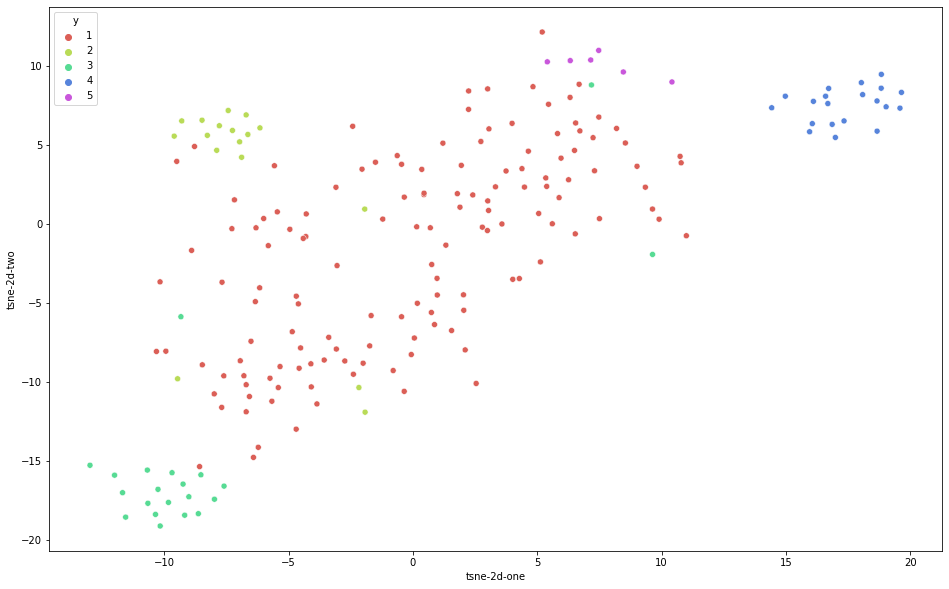

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
lung_X['tsne-2d-one'] = tsne_results[:,0]
lung_X['tsne-2d-two'] = tsne_results[:,1]
lung_X['y'] = lung_Y

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=lung_X,
    legend="full",
    alpha=1
)

### t-SNE plot after applying SMOATE to Lung Cancer dataset

In [63]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(lung_X_oversample)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 695 samples in 0.002s...
[t-SNE] Computed neighbors for 695 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 695 / 695
[t-SNE] Mean sigma: 7.016608
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.379921
[t-SNE] KL divergence after 300 iterations: 0.361497
t-SNE done! Time elapsed: 0.629951000213623 seconds


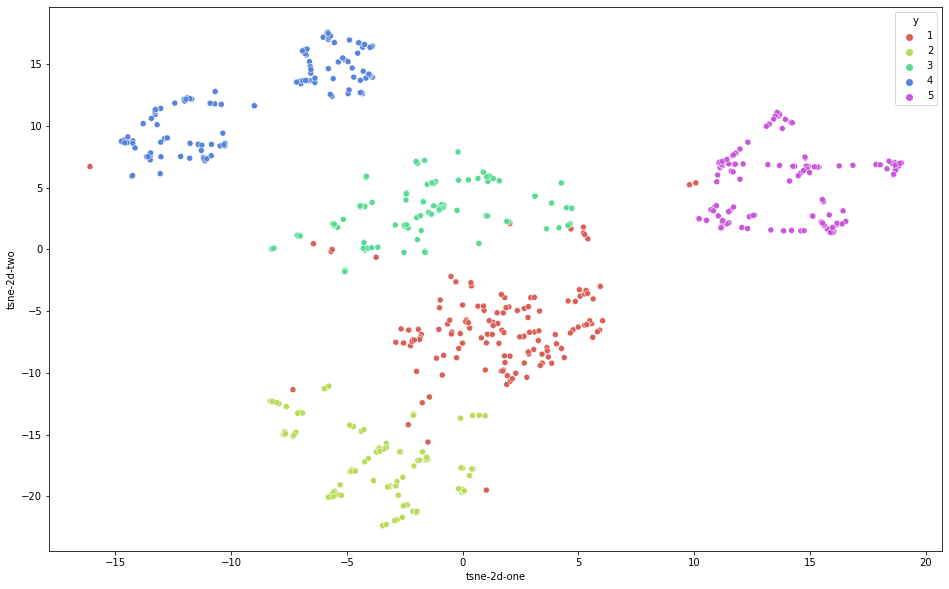

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
lung_X_oversample['tsne-2d-one'] = tsne_results[:,0]
lung_X_oversample['tsne-2d-two'] = tsne_results[:,1]
lung_X_oversample['y'] = lung_Y_oversample

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=lung_X_oversample,
    legend="full",
    alpha=1
)

### Loading ALL AML (Leukemia) Dataset

#### (ALL) Acute lymphocytic leukemia, (AML) Acute myelocytic leukemia

In [162]:
leukemia_X = pd.read_csv('/tf/Classification/Data/ALLAML(Leukemia)/X_ALLML.txt', header = None)
leukemia_Y = pd.read_csv('/tf/Classification/Data/ALLAML(Leukemia)/Y_ALLML.txt', header = None)

In [163]:
x_train_leuk, x_rest_leuk, y_train_leuk, y_rest_leuk = sklearn.model_selection.train_test_split(
        leukemia_X, leukemia_Y, test_size = 0.3, random_state = 27)

leukemia_X_rest_matrix = preprocessing.MinMaxScaler().fit_transform(x_rest_leuk)  ## Normalising
leukemia_Y_rest_arr = (y_rest_leuk[0]-1).to_numpy()
leukemia_Y_rest_one_hot = tf.keras.utils.to_categorical(leukemia_Y_rest_arr, num_classes=2)

### Tackling Class Imbalance problem using SMOATE

#### (Synthetic Minority Oversampling Technique)

In [164]:
oversample = SMOTE()

leuk_X_oversample, leuk_Y_oversample = oversample.fit_resample(x_train_leuk, y_train_leuk)
x_train_leuk = preprocessing.MinMaxScaler().fit_transform(leuk_X_oversample)

leuk_Y_oversample_arr = (leuk_Y_oversample[0]-1).to_numpy()
y_train_leuk = tf.keras.utils.to_categorical(leuk_Y_oversample_arr, num_classes=2)

leuk_Y_oversample.value_counts()

2    36
1    36
dtype: int64

### Splitting ALL AML dataset into Train, Test and Validation

In [165]:
x_valid_leuk, x_test_leuk, y_valid_leuk, y_test_leuk = sklearn.model_selection.train_test_split(
        leukemia_X_rest_matrix, leukemia_Y_rest_one_hot, test_size = 0.50, random_state = 27)

In [166]:
print(x_test_leuk.shape, x_valid_leuk.shape, x_train_leuk.shape)
print(y_test_leuk.shape, y_valid_leuk.shape, y_train_leuk.shape)
print(np.sum(y_valid_leuk, 0))
print(np.sum(y_test_leuk, 0))
print(np.sum(y_train_leuk, 0))

(11, 7129) (11, 7129) (72, 7129)
(11, 2) (11, 2) (72, 2)
[5. 6.]
[6. 5.]
[36. 36.]


### t-SNE plot before applying SMOATE to Leukemia Cancer dataset

In [132]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(leukemia_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.001s...
[t-SNE] Computed neighbors for 72 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 40.805307
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.740532
[t-SNE] KL divergence after 300 iterations: 0.892553
t-SNE done! Time elapsed: 0.29535484313964844 seconds


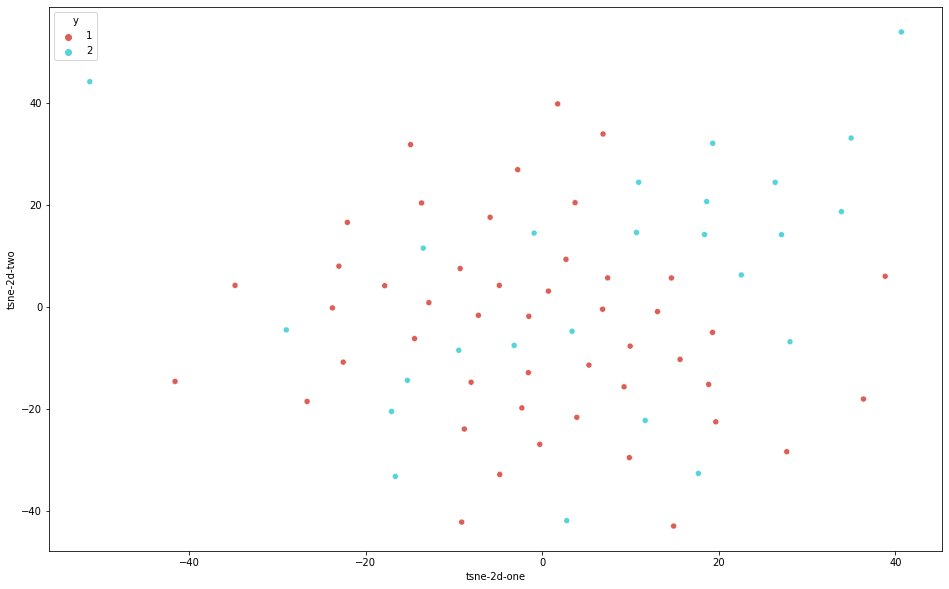

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
leukemia_X['tsne-2d-one'] = tsne_results[:,0]
leukemia_X['tsne-2d-two'] = tsne_results[:,1]
leukemia_X['y'] = leukemia_Y

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=leukemia_X,
    legend="full",
    alpha=1
)

### t-SNE plot after applying SMOATE to Leukemia Cancer dataset

In [137]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(leuk_X_oversample)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 93 nearest neighbors...
[t-SNE] Indexed 94 samples in 0.001s...
[t-SNE] Computed neighbors for 94 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 94 / 94
[t-SNE] Mean sigma: 38.248414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.103596
[t-SNE] KL divergence after 300 iterations: 1.050917
t-SNE done! Time elapsed: 0.3125946521759033 seconds


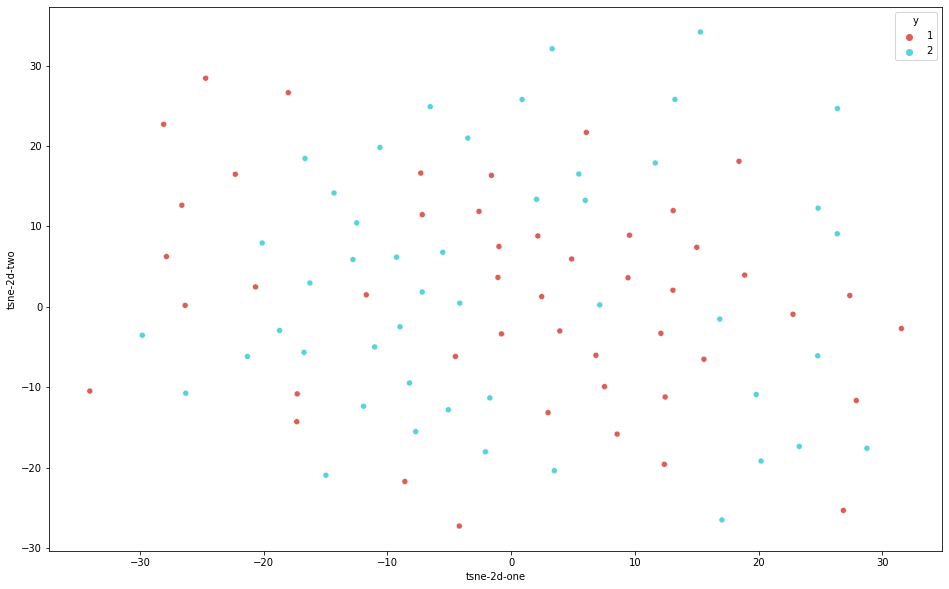

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
leuk_X_oversample['tsne-2d-one'] = tsne_results[:,0]
leuk_X_oversample['tsne-2d-two'] = tsne_results[:,1]
leuk_X_oversample['y'] = leuk_Y_oversample

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=leuk_X_oversample,
    legend="full",
    alpha=1
)

### Loading Prostate Cancer Data

In [65]:
pros_X = pd.read_csv('/tf/Classification/Data/Prostate/X_prostate.txt', header = None)
pros_Y = pd.read_csv('/tf/Classification/Data/Prostate/Y_prostate.txt', header = None)
pros_X_matrix = preprocessing.MinMaxScaler().fit_transform(pros_X) ## Normalising
pros_Y_arr = (pros_Y[0]-1).to_numpy()
pros_Y_one_hot = tf.keras.utils.to_categorical(pros_Y_arr, num_classes=2)

### Splitting Prostate Cancer dataset into Train, Test and Validation

In [66]:
x_train_pros, x_test_pros, y_train_pros, y_test_pros = sklearn.model_selection.train_test_split(
        pros_X_matrix, pros_Y_one_hot, test_size = 0.10, random_state = 27)
x_train_pros, x_valid_pros, y_train_pros, y_valid_pros = sklearn.model_selection.train_test_split(
        x_train_pros, y_train_pros, test_size=(1/9))

In [67]:
print(x_test_pros.shape, x_valid_pros.shape, x_train_pros.shape)
print(np.sum(y_valid_pros, 0))
print(np.sum(y_test_pros, 0))
print(np.sum(y_train_pros, 0))

(11, 5966) (11, 5966) (80, 5966)
[6. 5.]
[4. 7.]
[40. 40.]


### Building a subnetwork with features from the S set (Train Phase)

In [182]:
def build_a_subnetwork(inputShape, prevModel, subtypes):
    
    regulariser_const = 0.001
    hidden1_nodes = 100
    hidden2_nodes = 50
    hidden3_nodes = 100
#     hidden4_nodes = 10
    
    if(prevModel != None):
        
        layer0_wts = (prevModel.layers[0].weights[0]).numpy()
        layer1_wts = tf.constant_initializer((prevModel.layers[2].weights[0]).numpy())
        layer2_wts = tf.constant_initializer((prevModel.layers[4].weights[0]).numpy())
#         layer3_wts = tf.constant_initializer((prevModel.layers[3].weights[0]).numpy())
        
        initializer = tf.keras.initializers.GlorotNormal()  ## Xavier initialization
        values = initializer(shape=(1, hidden1_nodes)).numpy() ## shape is (1, number of nodes in first hidden layer)
        
        layer0_wts_afterAddingFeature = np.concatenate((layer0_wts, values), axis = 0)

        layer0_wts  = tf.constant_initializer(layer0_wts_afterAddingFeature)
        
        print("layer_0 weights shape ",layer0_wts_afterAddingFeature.shape,"\n")
        
    else:
        
        layer0_wts = tf.keras.initializers.GlorotNormal()
        layer1_wts = tf.keras.initializers.GlorotNormal()
        layer2_wts = tf.keras.initializers.GlorotNormal()
#         layer3_wts = tf.keras.initializers.GlorotNormal()
        
    
#     prevWeightMatrix = prevWeights.numpy()
    
#     initializer = tf.keras.initializers.GlorotUniform()  ## Xavier initialization
#     values = initializer(shape=(1, 3)).numpy() ## shape is (1, number of nodes in first hidden layer)
    
#     curWtMatrix = np.concatenate((prevWeightMatrix, values), 0)
#     init = tf.constant_initializer(curWtMatrix[1:])
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden1_nodes, use_bias=False, activation=tf.nn.relu, input_shape=(inputShape,), kernel_initializer=layer0_wts),  # kernel regulariser are applied to weights
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(hidden2_nodes, use_bias=False, activation=tf.nn.relu, kernel_initializer=layer1_wts),  ## as per research paper we have to take lp regularisation where p = 2
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(hidden3_nodes, use_bias=False, activation=tf.nn.relu, kernel_initializer=layer2_wts),
#         tf.keras.layers.Dense(hidden4_nodes, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(regulariser_const), kernel_initializer=layer3_wts),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(subtypes, activation='softmax')
    ])
    
    return model

### Selecting new feature from the C set (Selection Phase)

In [183]:
def build_a_subnetwork_with_dropout(inputShape, prevModel, subtypes):
    
    regulariser_const = 0.001
    hidden1_nodes = 100
    hidden2_nodes = 50
    hidden3_nodes = 100
#     hidden4_nodes = 10
#     subtypes = 4
    
    if(prevModel != None):
        
        layer0_wts = (prevModel.layers[0].weights[0]).numpy()
        layer1_wts = tf.constant_initializer((prevModel.layers[2].weights[0]).numpy())
        layer2_wts = tf.constant_initializer((prevModel.layers[4].weights[0]).numpy())
#         layer3_wts = tf.constant_initializer((prevModel.layers[3].weights[0]).numpy())
        
#         initializer = tf.keras.initializers.GlorotNormal()  ## Xavier initialization
#         values = initializer(shape=(1, hidden1_nodes)).numpy() ## shape is (1, number of nodes in first hidden layer)
        
        values = np.zeros((1, hidden1_nodes))
        
        layer0_wts_afterAddingFeature = np.concatenate((layer0_wts, values), axis = 0)

        layer0_wts  = tf.constant_initializer(layer0_wts_afterAddingFeature)
        
    else:
        
        layer0_wts = tf.keras.initializers.GlorotNormal()
        layer1_wts = tf.keras.initializers.GlorotNormal()
        layer2_wts = tf.keras.initializers.GlorotNormal()
#         layer3_wts = tf.keras.initializers.GlorotNormal()
        
    
#     prevWeightMatrix = prevWeights.numpy()
    
#     initializer = tf.keras.initializers.GlorotUniform()  ## Xavier initialization
#     values = initializer(shape=(1, 3)).numpy() ## shape is (1, number of nodes in first hidden layer)
    
#     curWtMatrix = np.concatenate((prevWeightMatrix, values), 0)
#     init = tf.constant_initializer(curWtMatrix[1:])
    
    model = tf.keras.Sequential([
#         tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(hidden1_nodes, use_bias=False, activation=tf.nn.relu, input_shape=(inputShape,), kernel_initializer=layer0_wts),  # kernel regulariser are applied to weights
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(hidden2_nodes, use_bias=False, activation=tf.nn.relu, kernel_initializer=layer1_wts),  ## as per research paper we have to take lp regularisation where p = 2
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(hidden3_nodes, use_bias=False, activation=tf.nn.relu, kernel_initializer=layer2_wts),
        tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(hidden4_nodes, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(regulariser_const), kernel_initializer=layer3_wts),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(subtypes, activation='softmax')
    ])
    
    return model

In [174]:
from numpy import linalg as LA
def getNorm(grads):
    
    return LA.norm(grads)

In [175]:
def step(trainX, trainY, temp_model):
    
    opt = tf.keras.optimizers.Adagrad(lr=0.01)
    
    with tf.GradientTape() as tape:
        pred = temp_model(trainX)
        loss = categorical_crossentropy(trainY, pred)
        
    grads = tape.gradient(loss, temp_model.trainable_variables)
    opt.apply_gradients(zip(grads, temp_model.trainable_variables))
    
    return grads

In [184]:
import time
## arguments of the function are numpy arrays
def selectNewFeature(model, C_x, C_y, C_size, S_x, S_y, S_size, subtypes):
    
    maxSoFar = float('-inf')
    
    for i in range(C_size):
        
        temp_S_x = S_x;
        temp_S_y = S_y;
        
#       prevWeights = model.layer[0].weights[0]
 
        columnToAdd = C_x[:, i].reshape(-1, 1)    
        
        temp_S_x = np.append(temp_S_x, columnToAdd, axis = 1)
        
        gradSum = np.zeros((100,))   ## size  (number of nodes in first hidden layer,)
        
        EPOCHS = 10
        BS = temp_S_x.shape[0]
        numUpdates = 1

        # loop over the number of epochs
        for epoch in range(0, EPOCHS):
            # show the current epoch number
#             print("[INFO] starting epoch {}/{}...".format(
#                 epoch + 1, EPOCHS), end="")
            temp_model = build_a_subnetwork_with_dropout(S_size+1, model, subtypes)
            epochStart = time.time()
            
            for j in range(0, numUpdates):
                # determine starting and ending slice indexes for the current
                # batch
                start = j * BS
                end = start + BS
                grads = step(temp_S_x[start:end], temp_S_y[start:end], temp_model)

                gradSum = np.add((grads[0][S_size]).numpy(), gradSum)

            # show timing information for the epoch
#             epochEnd = time.time()
#             elapsed = (epochEnd - epochStart) / 60.0
#             print("took {:.4} minutes".format(elapsed))
        gradSum = gradSum / (EPOCHS*numUpdates)
        
        
        normOfNewWt = getNorm(gradSum)
        ##print("Norm of ",i,"th feature computed\n")
        
#         print("norm\n", normOfNewWt)
#         break
        
        if(normOfNewWt > maxSoFar):
            maxSoFar = normOfNewWt
            featureToAdd = i
            feature =  C_x[:, i].reshape(-1, 1)
            
    print("New feature selected\n")
        
#         temp_S_x.pop()
#         temp_S_y.pop()
    
    
    return featureToAdd, feature;

### Plotting

In [185]:
import matplotlib.pyplot as plt
def plot(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### Main Loop

In [186]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [187]:
def dnp(x_train, y_train, x_valid, y_valid, x_test, y_test, subtypes):
    
    S_size = 1
    C_size = (x_train.shape[1])
    S_x = np.ones((x_train.shape[0], 1))
    S_y = y_train
    C_x = x_train
    C_y = y_train
    
    x_val_curr = np.ones((x_valid.shape[0], 1))
    x_val_rem = x_valid
    
    x_test_curr = np.ones((x_valid.shape[0], 1))
    x_test_rem = x_test
    
    k = 10
    
    prevModel = None
    
    ## prevWeightMatrix = np.zeros((1, 100))  ## shape is (1, number of nodes in first hidden layer)
    
    while(True): ## S_size <= k
        
        model = build_a_subnetwork(S_size, prevModel, subtypes)
        
        opt = keras.optimizers.Adagrad(learning_rate=0.01)
        model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy", "AUC", f1_m])
        model.fit(S_x, S_y, epochs = 20, validation_data=(x_val_curr, y_valid), shuffle = True) 
        ## callbacks = EarlyStopping(monitor="val_loss", verbose = 1, patience = 2)
        
        plot(model.history)
        
        ##print(model.summary())
        
        ## prevWeightMatrix = model.layers[0].weights[0]
        
        prevModel = model
        
        print(model.layers[0].weights)
        
#         print(prevWeightMatrix)

        if(S_size == k):
            return model, S_x, x_test_curr, x_val_curr
        
        featureToAdd, feature = selectNewFeature(model, C_x, C_y, C_size, S_x, S_y, S_size, subtypes)
        
        print("Feature to add \n", featureToAdd)
        
#         break
        
        S_size += 1;
        C_size -= 1;
        
        
        ## Updating x_train
        columnToAdd = C_x[:, featureToAdd].reshape(-1, 1)
        
        S_x = np.append(S_x, columnToAdd, axis = 1)
        C_x = np.delete(C_x, featureToAdd, 1)
        
        ## Updating x_valid
        validColmnToAdd = x_val_rem[:, featureToAdd].reshape(-1, 1)
        
        x_val_curr = np.append(x_val_curr, validColmnToAdd, axis = 1)
        x_val_rem = np.delete(x_val_rem, featureToAdd, 1)
        
        ## Updating x_test 
        testColmnToAdd = x_test_rem[:, featureToAdd].reshape(-1, 1)
        
        x_test_curr = np.append(x_test_curr, testColmnToAdd, axis = 1)
        x_test_rem = np.delete(x_test_rem, featureToAdd, 1)
        
        
#     return model, x_test_curr
        
# dnp_model, S_x, x_test_curr, x_val_curr = dnp()

### Calling DNP for Breast Cancer

Epoch 1/15
15/15 [==============================] - 1s 24ms/step - loss: 1.3718 - accuracy: 0.3754 - auc: 0.5855 - f1_m: 0.0000e+00 - val_loss: 1.3351 - val_accuracy: 0.5172 - val_auc: 0.6638 - val_f1_m: 0.0000e+00
Epoch 2/15
15/15 [==============================] - 0s 5ms/step - loss: 1.3540 - accuracy: 0.4106 - auc: 0.5967 - f1_m: 0.0000e+00 - val_loss: 1.3187 - val_accuracy: 0.5172 - val_auc: 0.6638 - val_f1_m: 0.0000e+00
Epoch 3/15
15/15 [==============================] - 0s 5ms/step - loss: 1.3589 - accuracy: 0.3642 - auc: 0.5935 - f1_m: 0.0000e+00 - val_loss: 1.3013 - val_accuracy: 0.5172 - val_auc: 0.6638 - val_f1_m: 0.0000e+00
Epoch 4/15
15/15 [==============================] - 0s 6ms/step - loss: 1.3549 - accuracy: 0.3649 - auc: 0.5910 - f1_m: 0.0000e+00 - val_loss: 1.2887 - val_accuracy: 0.5172 - val_auc: 0.6667 - val_f1_m: 0.0000e+00
Epoch 5/15
15/15 [==============================] - 0s 6ms/step - loss: 1.3356 - accuracy: 0.4013 - auc: 0.6075 - f1_m: 0.0000e+00 - val_loss: 

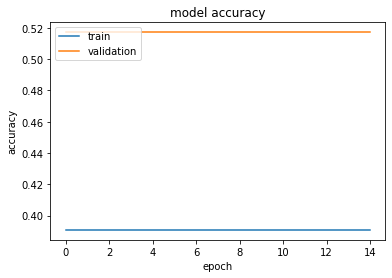

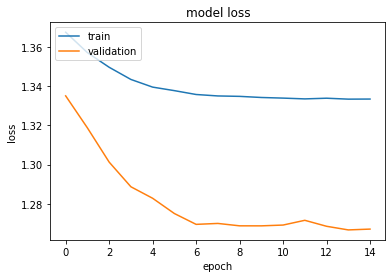

[<tf.Variable 'dense_11257276/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[-3.39956430e-04,  6.52597621e-02,  1.92666337e-01,
        -5.68615422e-02, -3.84301730e-02, -6.07947968e-02,
         3.29250693e-02, -3.19234788e-01,  1.43958002e-01,
        -2.31050025e-03, -8.55609030e-02,  4.64170948e-02,
        -1.01416461e-01,  3.85841802e-02,  2.55482346e-01,
         8.62796754e-02,  1.85114369e-01,  1.84775427e-01,
         1.33315444e-01, -1.41222745e-01, -2.22743116e-02,
         2.02608351e-02,  2.21611068e-01,  8.25864673e-02,
        -2.21708771e-02, -1.17618516e-01, -3.86559255e-02,
        -2.54419483e-02, -2.01670930e-01, -1.35337949e-01,
        -1.15084901e-01,  1.18365765e-01,  1.61064729e-01,
         1.42203704e-01, -1.78891778e-01, -1.10993408e-01,
        -3.16600874e-02,  2.45471150e-01, -3.97366565e-03,
        -2.20690623e-01,  8.10904130e-02,  2.14668095e-01,
         1.92994118e-01, -4.02343906e-02,  1.81202397e-01,
        -5.96047903e-06, -2.97293887e-

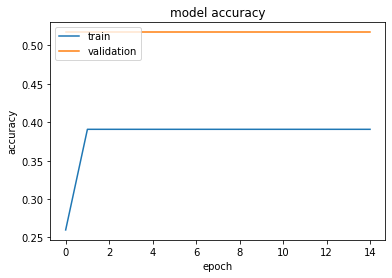

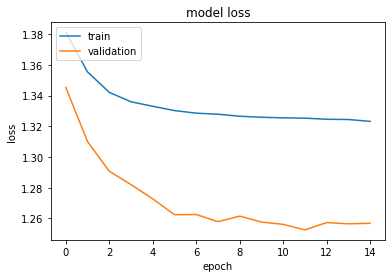

[<tf.Variable 'dense_11318040/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[ 1.46806566e-02,  7.61366561e-02,  2.11768150e-01,
        -5.68615422e-02, -4.98175025e-02, -6.07947968e-02,
         7.90435262e-03, -3.19234788e-01,  1.62942246e-01,
         1.22312577e-02, -8.84169862e-02,  4.59377915e-02,
        -1.01416461e-01,  3.93403210e-02,  2.57911891e-01,
         8.17740709e-02,  1.75890878e-01,  1.88181892e-01,
         1.33914262e-01, -1.41222745e-01, -2.46358719e-02,
         1.76845510e-02,  2.45241180e-01,  8.94912481e-02,
        -3.53930295e-02, -1.17618516e-01, -4.92510311e-02,
        -2.54419483e-02, -2.01670930e-01, -1.35337949e-01,
        -1.15084901e-01,  1.10242911e-01,  1.79432690e-01,
         1.53818056e-01, -1.78891778e-01, -1.10993408e-01,
        -3.16600874e-02,  2.49345303e-01, -3.97366565e-03,
        -2.20690623e-01,  5.30878715e-02,  2.19363272e-01,
         1.90390706e-01, -4.02343906e-02,  1.76130250e-01,
        -5.96047903e-06, -2.97293887e-

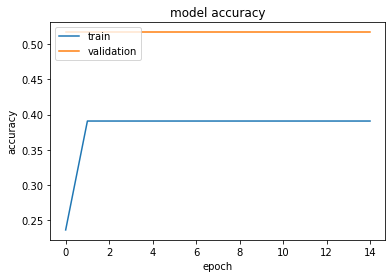

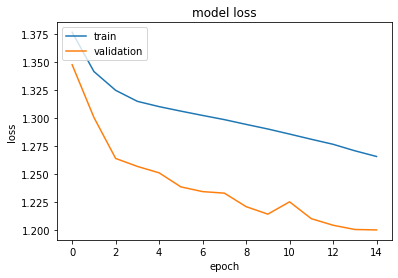

[<tf.Variable 'dense_11378764/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[ 3.05693666e-03,  5.79351671e-02,  2.09910870e-01,
        -3.18570063e-02, -4.98175025e-02, -6.07947968e-02,
         6.96891397e-02, -3.19234788e-01,  1.58460349e-01,
        -7.88415410e-03, -1.13331959e-01,  4.53614742e-02,
        -1.01416461e-01,  3.96530144e-02,  2.50052243e-01,
         6.44912571e-02,  1.78042352e-01,  2.11871788e-01,
         1.39330342e-01, -1.41222745e-01, -3.28311659e-02,
         3.50857861e-02,  2.35115170e-01,  7.29545355e-02,
        -5.67579493e-02, -1.17618516e-01, -6.59888610e-02,
        -7.17563648e-03, -2.01670930e-01, -1.35337949e-01,
        -1.15084901e-01,  1.17127359e-01,  1.83508456e-01,
         1.39933363e-01, -1.78891778e-01, -1.10993408e-01,
        -3.16600874e-02,  2.65469193e-01,  1.22294240e-02,
        -2.20690623e-01,  5.15109859e-02,  2.23438188e-01,
         1.88597530e-01, -4.02343906e-02,  1.83773220e-01,
        -5.96047903e-06, -2.97293887e-

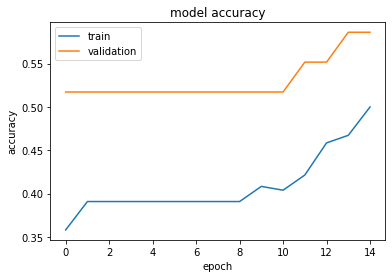

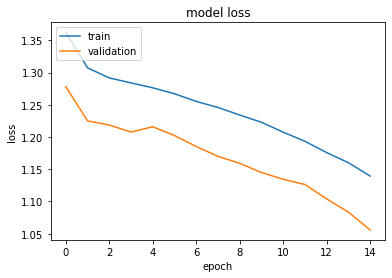

[<tf.Variable 'dense_11439448/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[-0.02370276,  0.05872831,  0.18980522, -0.03404246, -0.00180193,
        -0.0607948 ,  0.0851814 , -0.3192348 ,  0.14003842, -0.00864371,
        -0.10064171,  0.04577779, -0.10141646,  0.04015527,  0.2507143 ,
         0.0490475 ,  0.15822686,  0.27039355,  0.14745963, -0.14122275,
        -0.02382969,  0.04105105,  0.2332999 ,  0.06331713, -0.0344949 ,
        -0.11761852, -0.06598886, -0.01192222, -0.20167093, -0.13533795,
        -0.1150849 ,  0.13268855,  0.20939042,  0.12490085, -0.17889178,
        -0.11099341, -0.02966574,  0.26207477,  0.02635567, -0.22069062,
         0.06519066,  0.22773176,  0.18362726, -0.04023439,  0.19177943,
         0.00189082,  0.03121944,  0.14554296, -0.02992163, -0.0563122 ,
        -0.08798816, -0.00575183,  0.2926803 ,  0.31597003,  0.19557448,
        -0.17904139,  0.21545008,  0.05457342,  0.30276528,  0.01680568,
         0.05441692,  0.14832787, -0.03943207, 

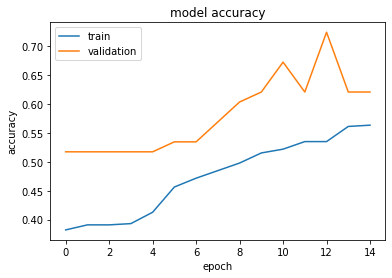

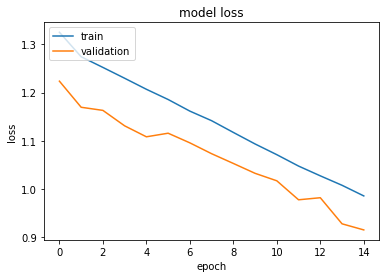

[<tf.Variable 'dense_11500092/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-1.23272426e-02,  6.46453276e-02,  1.84291095e-01,
        -3.28762978e-02,  3.46041657e-02, -6.07947968e-02,
         1.14452645e-01, -3.19234788e-01,  1.56293109e-01,
        -8.61738343e-03, -8.61754566e-02,  4.63599935e-02,
        -1.01416461e-01,  5.35210036e-02,  2.37243444e-01,
         3.27104926e-02,  1.54424667e-01,  2.87454605e-01,
         1.53900877e-01, -1.65027738e-01,  2.65472662e-03,
         7.23541006e-02,  2.30358765e-01,  7.46669248e-02,
        -5.20137325e-02, -1.17618516e-01, -6.59888610e-02,
         1.85077908e-04, -2.10176066e-01, -1.37071386e-01,
        -1.15084901e-01,  1.45434946e-01,  2.01221496e-01,
         1.15173817e-01, -1.78891778e-01, -1.10993408e-01,
        -6.54174620e-03,  2.76161402e-01,  3.14398929e-02,
        -2.20690623e-01,  7.35833794e-02,  2.48986274e-01,
         1.98517263e-01, -5.20949960e-02,  1.78431556e-01,
        -9.47720080e-04,  8.09838101e-

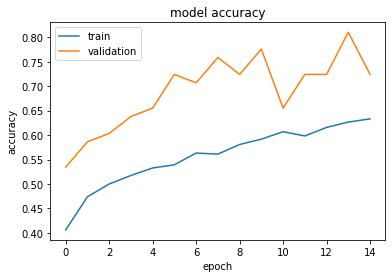

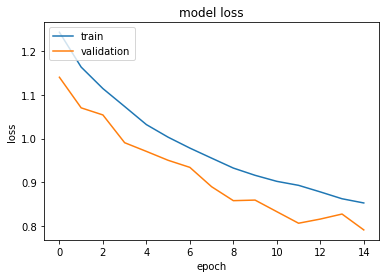

[<tf.Variable 'dense_11560696/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[-3.86476591e-02,  7.38878101e-02,  1.77597821e-01,
        -4.12842706e-02,  1.00565091e-01, -6.07947968e-02,
         1.29755914e-01, -3.19234788e-01,  1.62240237e-01,
        -3.75417789e-04, -6.46645427e-02,  4.63599935e-02,
        -1.01416461e-01,  9.64560285e-02,  2.65989393e-01,
         2.57612709e-02,  1.65907964e-01,  3.62031400e-01,
         1.67582810e-01, -1.77008837e-01,  2.05191877e-02,
         1.17315605e-01,  2.24057510e-01,  7.22730756e-02,
        -9.12212431e-02, -1.17618516e-01, -6.59888610e-02,
        -4.80909413e-03, -2.18388215e-01, -1.37071386e-01,
        -1.15084901e-01,  1.57427207e-01,  2.03519136e-01,
         1.39536902e-01, -1.78891778e-01, -1.10993408e-01,
         5.32497000e-03,  3.00567329e-01,  5.17642051e-02,
        -2.21238956e-01,  9.62593779e-02,  2.71973133e-01,
         2.14403301e-01, -5.25947474e-02,  1.88782468e-01,
        -9.47720080e-04,  1.04948856e-

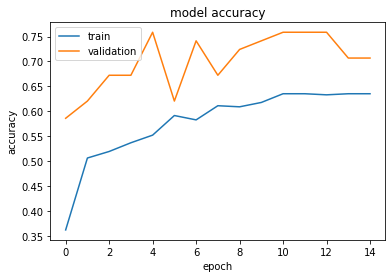

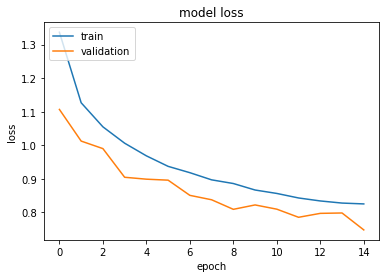

[<tf.Variable 'dense_11621260/kernel:0' shape=(7, 100) dtype=float32, numpy=
array([[-7.03499317e-02,  7.20982775e-02,  1.62826762e-01,
        -4.14703153e-02,  1.20785385e-01, -6.07947968e-02,
         1.52778402e-01, -3.19234788e-01,  1.42381072e-01,
         1.22354797e-03, -3.51192877e-02,  4.63599935e-02,
        -1.01416461e-01,  1.08522333e-01,  2.75069177e-01,
         2.32394934e-02,  1.80223361e-01,  3.82960796e-01,
         1.87984750e-01, -1.88786179e-01,  4.83622923e-02,
         1.37656093e-01,  2.33938292e-01,  6.36866316e-02,
        -1.02833822e-01, -1.17618516e-01, -6.59888610e-02,
         3.99736455e-03, -2.18388215e-01, -1.39278978e-01,
        -1.15084901e-01,  1.71154648e-01,  2.31891632e-01,
         1.37704268e-01, -1.78891778e-01, -1.10993408e-01,
         2.91851405e-02,  2.80362040e-01,  5.19196913e-02,
        -2.21161023e-01,  1.04327947e-01,  2.77544618e-01,
         2.23257795e-01, -5.25947474e-02,  1.89002633e-01,
        -9.47720080e-04,  1.38988137e-

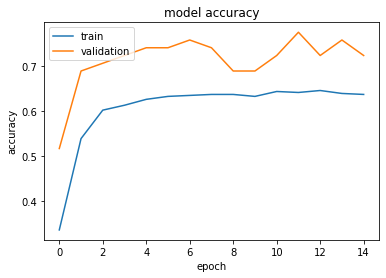

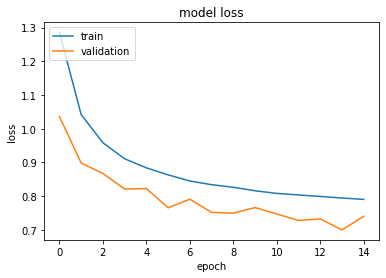

[<tf.Variable 'dense_11681784/kernel:0' shape=(8, 100) dtype=float32, numpy=
array([[-9.12022814e-02,  7.59734809e-02,  1.54906452e-01,
        -4.14703153e-02,  1.77691519e-01, -5.89414127e-02,
         1.69681087e-01, -3.19234788e-01,  1.32376581e-01,
         2.23920704e-03, -1.25379479e-02,  4.63599935e-02,
        -1.01416461e-01,  1.24826878e-01,  3.01380187e-01,
         1.08294282e-02,  1.76222637e-01,  3.95260483e-01,
         2.17998475e-01, -1.92933336e-01,  8.10411572e-02,
         1.71207488e-01,  2.50373900e-01,  5.28767556e-02,
        -1.26416028e-01, -1.12856999e-01, -6.59888610e-02,
        -1.82132353e-05, -2.18388215e-01, -1.52837589e-01,
        -1.14787854e-01,  1.88502029e-01,  2.45355815e-01,
         1.40947193e-01, -1.78891778e-01, -1.06068514e-01,
         5.26223816e-02,  2.79439092e-01,  7.15761483e-02,
        -1.94767058e-01,  1.00690581e-01,  2.98382282e-01,
         2.32383549e-01, -5.25947474e-02,  1.83680296e-01,
        -9.47720080e-04,  1.82092860e-

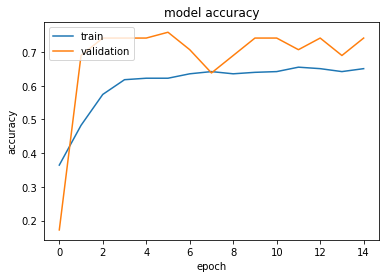

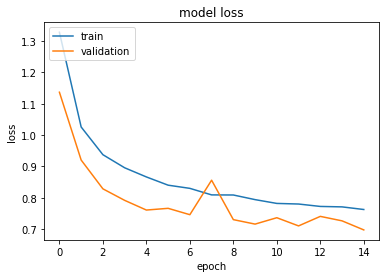

[<tf.Variable 'dense_11742268/kernel:0' shape=(9, 100) dtype=float32, numpy=
array([[-1.22839347e-01,  7.21838400e-02,  1.45422131e-01,
        -4.14703153e-02,  1.99724331e-01, -6.10263087e-02,
         1.94919541e-01, -3.19234788e-01,  1.08110897e-01,
         1.93626364e-03, -1.98194478e-03,  4.63599935e-02,
        -1.01416461e-01,  1.32212177e-01,  3.13090920e-01,
        -4.96472372e-03,  1.55026779e-01,  4.15151358e-01,
         2.17501596e-01, -1.86386779e-01,  9.97494757e-02,
         1.89734951e-01,  2.45789319e-01,  5.50846234e-02,
        -1.55164286e-01, -1.12313755e-01, -6.85286596e-02,
        -2.78288405e-03, -2.18388215e-01, -1.52826428e-01,
        -1.14227921e-01,  1.97690532e-01,  2.40993917e-01,
         1.53178051e-01, -1.78891778e-01, -9.06136632e-02,
         6.15735874e-02,  2.74744987e-01,  6.35192171e-02,
        -2.00511381e-01,  9.44461673e-02,  3.18783134e-01,
         2.13779613e-01, -5.25947474e-02,  1.70576274e-01,
        -9.47720080e-04,  2.17007637e-

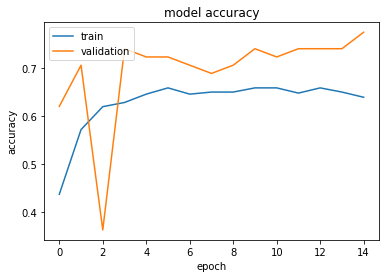

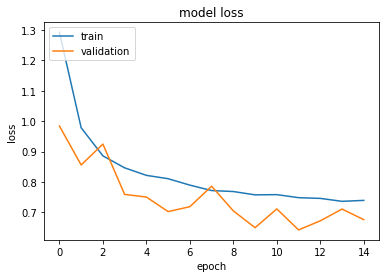

[<tf.Variable 'dense_11802712/kernel:0' shape=(10, 100) dtype=float32, numpy=
array([[-1.24563284e-01,  7.00689554e-02,  1.22882925e-01,
        -4.14703153e-02,  2.23295942e-01, -6.71069697e-02,
         2.11924329e-01, -3.19234788e-01,  9.59548503e-02,
        -3.93520575e-03,  2.68623792e-03,  4.63599935e-02,
        -1.01416461e-01,  1.47341013e-01,  3.30948472e-01,
        -2.19461545e-02,  1.56937405e-01,  4.37222749e-01,
         2.28050381e-01, -1.66270882e-01,  1.08074673e-01,
         2.06083030e-01,  2.40897566e-01,  4.70962077e-02,
        -1.76750019e-01, -1.12520091e-01, -5.06692939e-02,
        -8.39465391e-03, -2.18388215e-01, -1.70151308e-01,
        -1.13251589e-01,  2.04934970e-01,  2.41035506e-01,
         1.68360278e-01, -1.78585529e-01, -9.79278982e-02,
         6.47577792e-02,  2.87441492e-01,  5.41676395e-02,
        -2.09490791e-01,  9.56814140e-02,  3.25744420e-01,
         2.07959309e-01, -5.25947474e-02,  1.68927625e-01,
        -9.47720080e-04,  2.52321273e

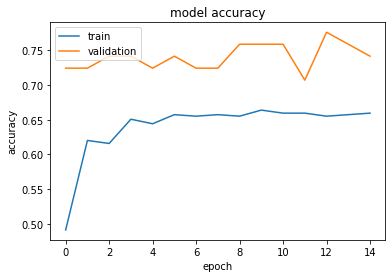

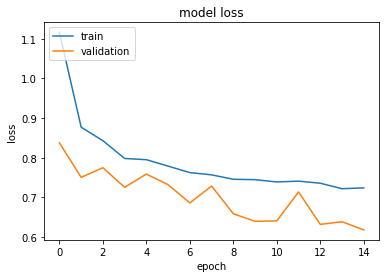

[<tf.Variable 'dense_11863116/kernel:0' shape=(11, 100) dtype=float32, numpy=
array([[-0.12488006,  0.07660157,  0.11270152, ...,  0.53284293,
         0.04157188,  0.24559626],
       [ 0.27524197, -0.00753358,  0.14540689, ...,  0.09828858,
        -0.20840281, -0.01261456],
       [ 0.78292155, -0.20538221,  0.427157  , ..., -0.6499253 ,
        -0.08923281,  0.04766751],
       ...,
       [-0.13801256,  0.09432919,  0.20837396, ..., -0.01795099,
         0.06664968, -0.01953458],
       [-0.17546284, -0.15409093,  0.03351983, ..., -0.12778355,
        -0.16340022,  0.13296252],
       [ 0.00899107,  0.1061228 , -0.18564539, ..., -0.11800846,
         0.12700555,  0.29738086]], dtype=float32)>]
Norm of  0 th feature computed

Norm of  1 th feature computed

Norm of  2 th feature computed

Norm of  3 th feature computed

Norm of  4 th feature computed

Norm of  5 th feature computed

Norm of  6 th feature computed

Norm of  7 th feature computed

Norm of  8 th feature computed

Norm

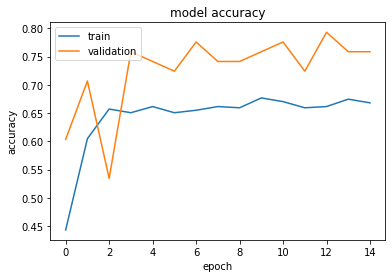

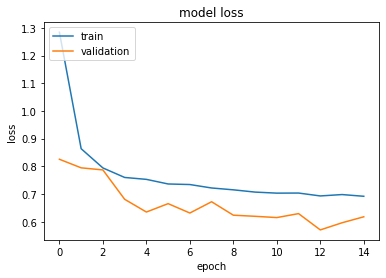

[<tf.Variable 'dense_11923480/kernel:0' shape=(12, 100) dtype=float32, numpy=
array([[-0.14702693,  0.0788468 ,  0.10054591, ...,  0.55780286,
         0.04106447,  0.23561327],
       [ 0.27701902, -0.0058876 ,  0.12872186, ...,  0.114815  ,
        -0.20847984, -0.01759785],
       [ 0.78657997, -0.20422056,  0.43637934, ..., -0.65520465,
        -0.08925696,  0.03267767],
       ...,
       [-0.163048  , -0.15379195,  0.04851525, ..., -0.14491816,
        -0.163555  ,  0.11513168],
       [-0.02977694,  0.10771861, -0.19125055, ..., -0.08844125,
         0.12662317,  0.29110053],
       [-0.05647906,  0.10517103, -0.15742895, ..., -0.19580561,
         0.05867971, -0.21886277]], dtype=float32)>]
Norm of  0 th feature computed

Norm of  1 th feature computed

Norm of  2 th feature computed

Norm of  3 th feature computed

Norm of  4 th feature computed

Norm of  5 th feature computed

Norm of  6 th feature computed

Norm of  7 th feature computed

Norm of  8 th feature computed

Norm

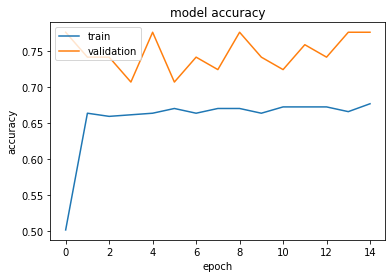

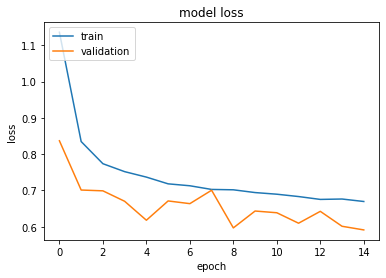

[<tf.Variable 'dense_11983804/kernel:0' shape=(13, 100) dtype=float32, numpy=
array([[-0.1602244 ,  0.09038923,  0.08820854, ...,  0.5811898 ,
         0.0408943 ,  0.24543129],
       [ 0.27249348, -0.00308865,  0.12395844, ...,  0.13242522,
        -0.20849465, -0.0115841 ],
       [ 0.79732394, -0.20371032,  0.44193208, ..., -0.6587145 ,
        -0.08926627,  0.03494372],
       ...,
       [-0.03889183,  0.11741942, -0.20562655, ..., -0.07058292,
         0.12651642,  0.29528043],
       [-0.04832879,  0.10966064, -0.1573601 , ..., -0.19808617,
         0.05856058, -0.21870887],
       [ 0.0119719 , -0.10706699,  0.03645762, ..., -0.09204485,
        -0.10452608,  0.01204093]], dtype=float32)>]
Norm of  0 th feature computed

Norm of  1 th feature computed

Norm of  2 th feature computed

Norm of  3 th feature computed

Norm of  4 th feature computed

Norm of  5 th feature computed

Norm of  6 th feature computed

Norm of  7 th feature computed

Norm of  8 th feature computed

Norm

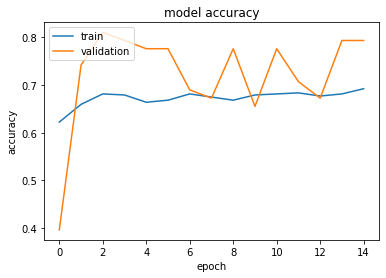

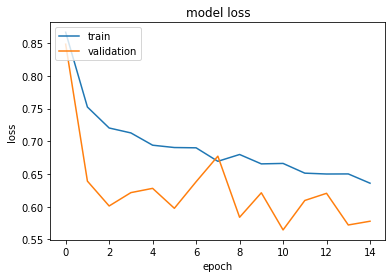

[<tf.Variable 'dense_12044088/kernel:0' shape=(14, 100) dtype=float32, numpy=
array([[-1.69209510e-01,  8.86508301e-02,  8.90728235e-02, ...,
         5.84279120e-01,  4.18552533e-02,  2.47385621e-01],
       [ 2.77470589e-01, -3.49190715e-03,  1.16265878e-01, ...,
         1.41983777e-01, -2.08356589e-01, -1.11742979e-02],
       [ 8.12327325e-01, -2.03920409e-01,  4.52744842e-01, ...,
        -6.74577951e-01, -8.92196521e-02,  3.17287967e-02],
       ...,
       [-3.94586362e-02,  1.09018005e-01, -1.51239663e-01, ...,
        -2.11628631e-01,  5.91185056e-02, -2.20800176e-01],
       [-1.17833028e-02, -1.08238250e-01,  3.38233784e-02, ...,
        -7.93313235e-02, -1.03825912e-01,  1.64168291e-02],
       [ 3.28901457e-04, -2.32068133e-02,  9.44472253e-02, ...,
         3.59884673e-03,  5.93640432e-02, -5.37295714e-02]], dtype=float32)>]
Norm of  0 th feature computed

Norm of  1 th feature computed

Norm of  2 th feature computed

Norm of  3 th feature computed

Norm of  4 th featur

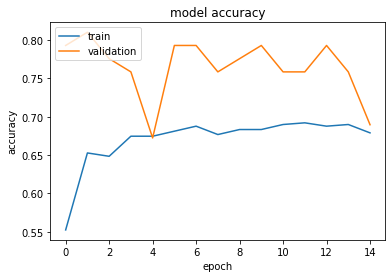

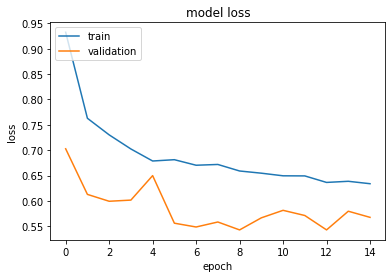

[<tf.Variable 'dense_12104332/kernel:0' shape=(15, 100) dtype=float32, numpy=
array([[-0.17980947,  0.08440851,  0.08573011, ...,  0.59875077,
         0.04408952,  0.2567415 ],
       [ 0.28261128, -0.00395765,  0.10976889, ...,  0.15375307,
        -0.20804213, -0.01157828],
       [ 0.8171749 , -0.20464359,  0.45418996, ..., -0.67516446,
        -0.08911048,  0.03439386],
       ...,
       [-0.03560848, -0.11145236,  0.03102029, ..., -0.06196826,
        -0.10219082,  0.02470632],
       [-0.03034927, -0.02568612,  0.08047216, ...,  0.04206214,
         0.05985124, -0.04239208],
       [-0.07080184,  0.21418448, -0.00087186, ...,  0.1299163 ,
         0.10154451, -0.00873579]], dtype=float32)>]


In [103]:
dnp_model, S_x, x_test_curr, x_val_curr = dnp(x_train, y_train, x_valid, y_valid, x_test, y_test, subtypes = 4)  ## For breast cancer

### Saving the Breast Cancer Model

In [105]:
dnp_model.save("dnpModel")
%store S_x
%store x_test_curr
%store x_val_curr

INFO:tensorflow:Assets written to: dnpModel/assets
Stored 'S_x' (ndarray)
Stored 'x_test_curr' (ndarray)
Stored 'x_val_curr' (ndarray)


### Evaluating Breast Cancer Model

In [104]:
temp = x_test_curr
print(temp.shape)
dnp_model.evaluate(temp, y_test, verbose = 2)

(58, 15)
2/2 - 0s - loss: 0.8318 - accuracy: 0.7759 - auc: 0.9087 - f1_m: 0.7701


[0.8318139314651489,
 0.7758620977401733,
 0.9087396264076233,
 0.7700821757316589]

### Loading the saved Breast Cancer model

In [260]:
reconstructed_dnp_model = keras.models.load_model("dnpModel", custom_objects={'f1_m': f1_m})
%store -r S_x
%store -r x_test_curr
%store -r x_val_curr

### Calling DNP for Lung Cancer

Epoch 1/10
18/18 [==============================] - 1s 23ms/step - loss: 1.6150 - accuracy: 0.2124 - auc: 0.4834 - f1_m: 0.0000e+00 - val_loss: 1.6130 - val_accuracy: 0.1857 - val_auc: 0.4857 - val_f1_m: 0.0000e+00
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 1.6090 - accuracy: 0.2226 - auc: 0.5107 - f1_m: 0.0000e+00 - val_loss: 1.6126 - val_accuracy: 0.1857 - val_auc: 0.4839 - val_f1_m: 0.0000e+00
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 1.6084 - accuracy: 0.2321 - auc: 0.5167 - f1_m: 0.0000e+00 - val_loss: 1.6118 - val_accuracy: 0.1857 - val_auc: 0.4839 - val_f1_m: 0.0000e+00
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 1.6114 - accuracy: 0.1992 - auc: 0.4906 - f1_m: 0.0000e+00 - val_loss: 1.6116 - val_accuracy: 0.1857 - val_auc: 0.4839 - val_f1_m: 0.0000e+00
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 1.6118 - accuracy: 0.2006 - auc: 0.4815 - f1_m: 0.0000e+00 - val_loss: 

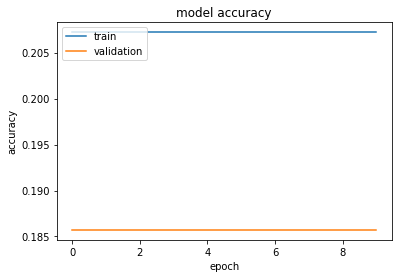

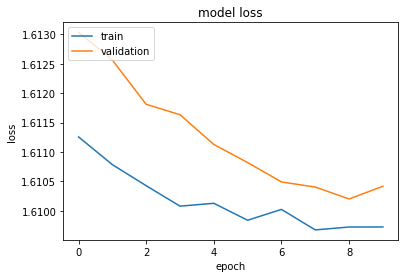

[<tf.Variable 'dense_1743000/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[ 8.95820633e-02,  2.08251938e-01, -1.58274636e-01,
         7.90482610e-02, -1.98343750e-02,  2.38314822e-01,
        -1.45269573e-01, -3.89165394e-02, -1.17803523e-02,
         8.06927457e-02,  1.24748960e-01,  1.42922968e-01,
        -8.98221955e-02, -3.48608792e-02,  5.43392226e-02,
         1.15648843e-01,  1.87993467e-01, -7.64944078e-03,
         5.18056452e-02, -2.72920847e-01, -2.92053699e-01,
         2.19211802e-01,  9.39920917e-02, -7.93072432e-02,
         1.42051145e-01, -1.12513877e-01, -1.14857785e-01,
        -1.56845581e-02, -1.03278667e-01,  1.83578536e-01,
        -8.50844979e-02,  2.78551374e-02, -4.34903689e-02,
         2.51412839e-02,  9.40294564e-02,  1.97701886e-01,
        -2.90716261e-01, -1.10833630e-01, -1.11464925e-01,
        -2.50902139e-02, -2.09016502e-01,  3.47604789e-02,
         9.12246257e-02,  8.10123235e-02,  1.56821579e-01,
        -7.92652965e-02,  1.78129211e-0

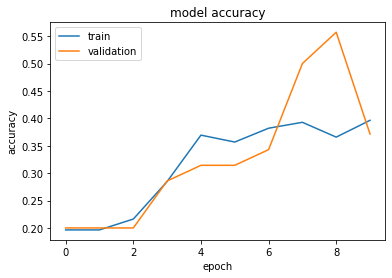

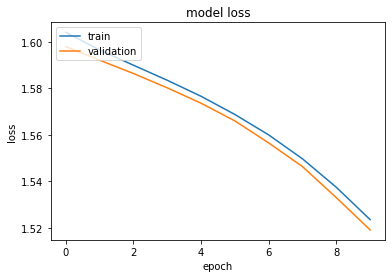

[<tf.Variable 'dense_1875484/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[ 0.13603015,  0.20216674, -0.15827464,  0.08889301, -0.01812016,
         0.22230966, -0.09866428, -0.03891654,  0.01183948,  0.07222533,
         0.07697769,  0.160671  , -0.0898222 , -0.03253958,  0.07489388,
         0.17704445,  0.20134099, -0.00764944,  0.06576703, -0.27292085,
        -0.2920537 ,  0.2189339 ,  0.10145734, -0.07930724,  0.12798615,
        -0.11251388, -0.11485779, -0.01963743, -0.10231767,  0.22039129,
        -0.05043625, -0.0054198 , -0.02818365,  0.01641466,  0.07406226,
         0.16603468, -0.29071626, -0.11083363, -0.11146493, -0.02509021,
        -0.2090165 ,  0.02067358,  0.09246761,  0.12948558,  0.18476203,
        -0.0792653 ,  0.19565703, -0.02519767,  0.12890056, -0.21407689,
         0.03293949, -0.12932836,  0.20108108, -0.05420361, -0.21614897,
        -0.09653277,  0.05877079, -0.00244167,  0.01031257, -0.02882341,
        -0.2941982 , -0.20463167, -0.2311227 , -

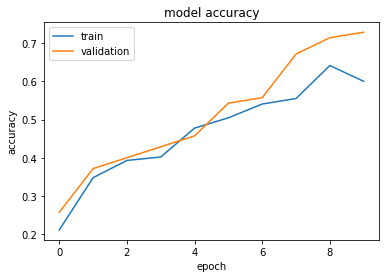

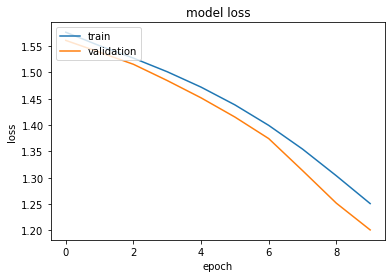

[<tf.Variable 'dense_2007928/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[ 1.95225313e-01,  1.99908569e-01, -1.58274636e-01,
         8.59583244e-02,  1.48631129e-02,  2.58091956e-01,
        -9.55808237e-02, -3.89165394e-02,  9.49892215e-03,
         4.89602573e-02,  1.38277069e-01,  1.58332214e-01,
        -5.96236810e-02, -3.49253491e-02,  7.51516223e-02,
         2.32448027e-01,  2.05203831e-01, -7.64944078e-03,
         9.49573144e-02, -2.72920847e-01, -2.92053699e-01,
         2.28212729e-01,  1.20527893e-01, -7.93072432e-02,
         1.34888828e-01, -1.23079836e-01, -1.14857785e-01,
         2.78140251e-02, -4.89647873e-02,  2.96643555e-01,
        -5.17627411e-02, -2.02341136e-02, -1.11637423e-02,
         1.47246001e-02,  1.09521836e-01,  1.71560258e-01,
        -2.90716261e-01, -1.29979745e-01, -1.11464925e-01,
        -7.94804916e-02, -2.09016502e-01,  3.93963344e-02,
         1.07335702e-01,  1.69438258e-01,  1.74616456e-01,
        -7.92652965e-02,  1.98791474e-0

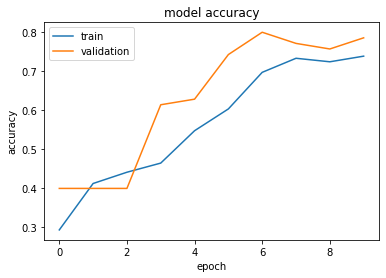

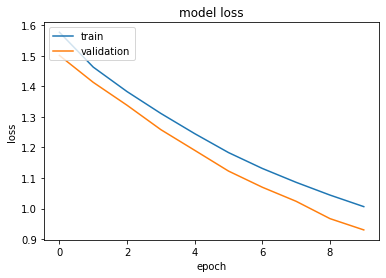

[<tf.Variable 'dense_2140332/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[ 2.53497005e-01,  2.26318613e-01, -1.58274636e-01,
         1.03420399e-01,  1.85360797e-02,  2.65907705e-01,
        -1.09494328e-01,  8.61841347e-03,  3.43049094e-02,
         2.49180347e-02,  1.86503664e-01,  1.62529886e-01,
        -6.14052340e-02, -3.49253491e-02,  9.04184580e-02,
         2.70154417e-01,  2.35459462e-01, -7.64944078e-03,
         1.07938282e-01, -2.72920847e-01, -2.92053699e-01,
         2.58102149e-01,  1.28736854e-01, -7.93072432e-02,
         1.27130836e-01, -1.35434270e-01, -1.14857785e-01,
         7.45783225e-02, -3.47223319e-02,  3.48405600e-01,
        -4.18008156e-02, -4.76051681e-02, -1.22180283e-02,
         8.49849079e-03,  1.52331755e-01,  1.64313823e-01,
        -2.90716261e-01, -1.12589858e-01, -1.11464925e-01,
        -1.00090876e-01, -2.09016502e-01,  4.39327769e-02,
         1.37380347e-01,  1.69059217e-01,  1.71536535e-01,
        -7.92652965e-02,  2.29041085e-0

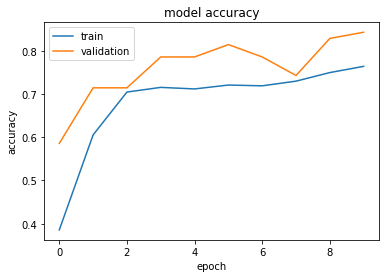

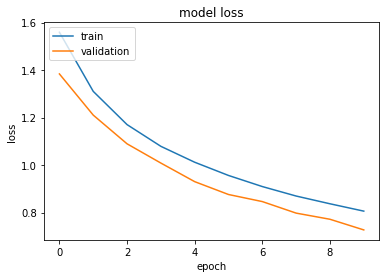

[<tf.Variable 'dense_2272696/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[ 2.84621656e-01,  2.29388386e-01, -1.58274636e-01,
         1.19293973e-01,  4.89281770e-03,  2.87211478e-01,
        -1.00158408e-01,  3.47388303e-03,  7.69931003e-02,
         1.16488384e-02,  2.31264904e-01,  1.57327235e-01,
        -8.01703110e-02, -3.49253491e-02,  8.26900899e-02,
         3.26589495e-01,  2.71606833e-01, -7.64944078e-03,
         1.26179501e-01, -2.72920847e-01, -2.92053699e-01,
         2.66115695e-01,  1.38845578e-01, -7.93072432e-02,
         1.28124893e-01, -1.35584682e-01, -1.14857785e-01,
         6.12202622e-02, -2.15037856e-02,  3.91090363e-01,
        -2.06515882e-02, -3.88306379e-02, -1.75598897e-02,
         4.51830868e-03,  1.82887822e-01,  1.78322598e-01,
        -2.90716261e-01, -1.20096207e-01, -1.11464925e-01,
        -1.00157574e-01, -2.09016502e-01,  4.77417000e-02,
         1.48249358e-01,  1.73952579e-01,  1.72869727e-01,
        -7.92652965e-02,  2.60204643e-0

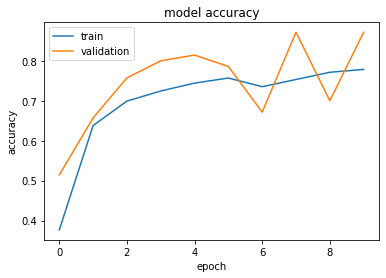

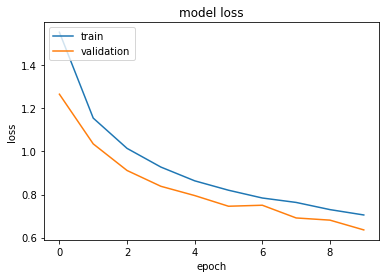

[<tf.Variable 'dense_2405020/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[ 2.80348271e-01,  2.37721771e-01, -1.34143129e-01,
         1.42458811e-01, -9.36823990e-03,  2.79537559e-01,
        -9.90221500e-02,  1.58551019e-02,  6.21051714e-02,
         1.34719978e-03,  2.61790484e-01,  1.51211604e-01,
        -8.43034089e-02, -3.49253491e-02,  9.61343199e-02,
         3.80450249e-01,  2.95954436e-01, -7.64944078e-03,
         1.42381340e-01, -2.72920847e-01, -2.92053699e-01,
         2.79199272e-01,  1.20331697e-01, -7.93072432e-02,
         1.37806639e-01, -1.38057649e-01, -1.14857785e-01,
         4.53212187e-02, -3.56669277e-02,  4.21618044e-01,
        -5.39004570e-04, -6.12490214e-02, -3.21953706e-02,
         4.51830868e-03,  1.73835307e-01,  1.94484919e-01,
        -2.90716261e-01, -1.18196137e-01, -1.18279390e-01,
        -1.02919616e-01, -2.09016502e-01,  4.36978936e-02,
         1.54192641e-01,  1.76822111e-01,  1.76191539e-01,
        -6.55241162e-02,  2.77886391e-0

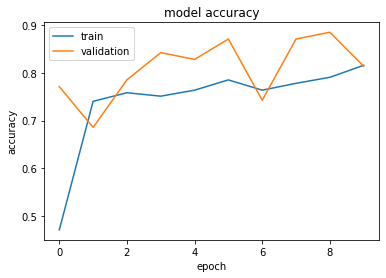

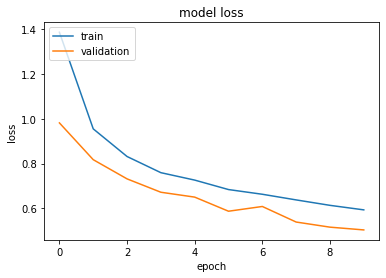

[<tf.Variable 'dense_2537304/kernel:0' shape=(7, 100) dtype=float32, numpy=
array([[ 0.28980514,  0.23396195, -0.13622515,  0.15229058, -0.02628284,
         0.2828396 , -0.09362003,  0.02114841,  0.06240115, -0.0091957 ,
         0.26969078,  0.14779648, -0.08444861, -0.01909222,  0.10323104,
         0.4005983 ,  0.31536517, -0.00764944,  0.14941306, -0.27292085,
        -0.2920537 ,  0.2791243 ,  0.1141401 , -0.06514318,  0.14752343,
        -0.13236262, -0.1243277 ,  0.04078458, -0.0470829 ,  0.4456978 ,
         0.0071504 , -0.08220932, -0.02584777,  0.00451831,  0.16517253,
         0.18229924, -0.29071626, -0.11994257, -0.11827939, -0.10514794,
        -0.2090165 ,  0.03124908,  0.14396559,  0.1664795 ,  0.1814939 ,
        -0.06987855,  0.2867004 , -0.02207967,  0.03000355, -0.21407689,
         0.09080164, -0.13594446,  0.42019963, -0.05420361, -0.21638528,
        -0.11274954,  0.10554945,  0.04474756,  0.02089335, -0.02130769,
        -0.26167655, -0.20463167, -0.24512175, -

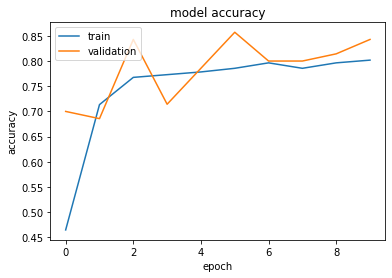

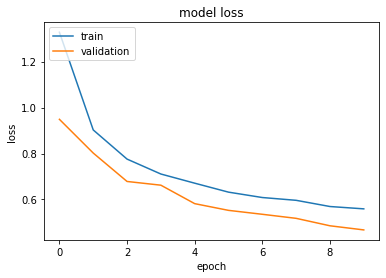

[<tf.Variable 'dense_2669548/kernel:0' shape=(8, 100) dtype=float32, numpy=
array([[ 3.08232158e-01,  2.33416796e-01, -1.21015944e-01,
         1.50420725e-01, -3.99742909e-02,  2.91200787e-01,
        -9.13665667e-02,  3.84715535e-02,  5.04097454e-02,
        -9.17535927e-03,  2.81544536e-01,  1.40114397e-01,
        -6.71534538e-02, -1.88406669e-02,  1.23000309e-01,
         4.16479617e-01,  3.15595835e-01, -7.64944078e-03,
         1.49869993e-01, -2.72920847e-01, -2.92053699e-01,
         3.06655049e-01,  1.10276103e-01, -3.90079208e-02,
         1.45898968e-01, -1.35313928e-01, -1.23746894e-01,
         3.35446522e-02, -4.72568199e-02,  4.53528196e-01,
         1.99406948e-02, -8.91480818e-02, -3.96922939e-02,
         4.51830868e-03,  1.56480059e-01,  2.16133788e-01,
        -2.90716261e-01, -1.31710619e-01, -1.18279390e-01,
        -1.05243385e-01, -2.09016502e-01,  2.94879545e-02,
         1.48394719e-01,  1.64570004e-01,  1.87132388e-01,
        -8.82925242e-02,  2.95257151e-0

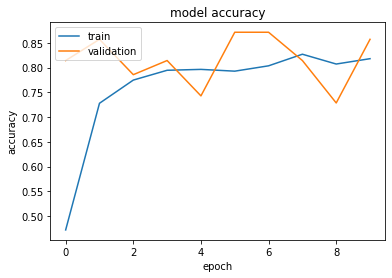

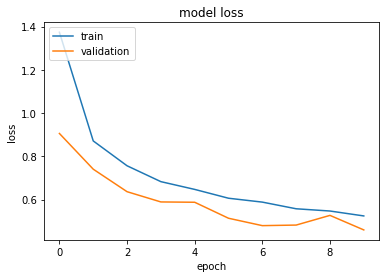

[<tf.Variable 'dense_2801752/kernel:0' shape=(9, 100) dtype=float32, numpy=
array([[ 3.06091368e-01,  2.35451967e-01, -1.19089812e-01,
         1.53314695e-01, -2.80173216e-02,  2.87706107e-01,
        -9.91189033e-02,  4.19032574e-02,  5.11167347e-02,
        -1.47025299e-03,  3.02385122e-01,  1.36804223e-01,
        -6.19214736e-02, -1.91923864e-02,  1.24036640e-01,
         4.22944516e-01,  3.17839533e-01, -1.45454863e-02,
         1.59346193e-01, -2.72920847e-01, -2.92053699e-01,
         3.08610767e-01,  1.03207059e-01, -4.08095792e-02,
         1.45898968e-01, -1.34409025e-01, -1.28600508e-01,
         4.90603037e-02, -5.51300198e-02,  4.76436496e-01,
         4.04586345e-02, -9.55251902e-02, -4.34736051e-02,
         4.51830868e-03,  1.61450222e-01,  2.60637373e-01,
        -2.90716261e-01, -1.19838610e-01, -1.18279390e-01,
        -1.06779769e-01, -2.09016502e-01,  2.89716367e-02,
         1.62595034e-01,  1.76903784e-01,  1.93381056e-01,
        -6.21512458e-02,  3.05497050e-0

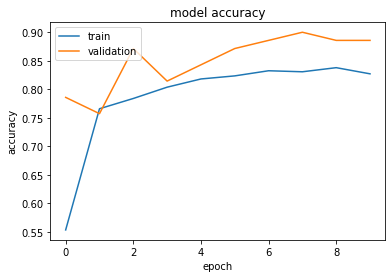

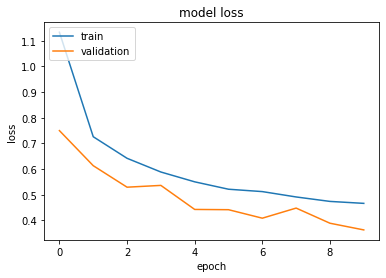

[<tf.Variable 'dense_2933916/kernel:0' shape=(10, 100) dtype=float32, numpy=
array([[ 3.24019969e-01,  2.26153120e-01, -1.18276708e-01,
         1.56095058e-01, -2.04671510e-02,  2.98136830e-01,
        -9.55340713e-02,  5.25524803e-02,  5.81038259e-02,
         6.83444412e-03,  3.00717324e-01,  1.52304545e-01,
        -5.82904294e-02, -1.76780950e-02,  1.33962557e-01,
         4.25940245e-01,  3.16555351e-01, -1.56930909e-02,
         1.58939153e-01, -2.72920847e-01, -2.92053699e-01,
         3.12760472e-01,  1.14115052e-01, -3.87080349e-02,
         1.44954354e-01, -1.46243960e-01, -1.29236892e-01,
         6.11966252e-02, -4.32110988e-02,  4.80887145e-01,
         4.56583351e-02, -8.62954855e-02, -4.35472094e-02,
         4.51830868e-03,  1.72373250e-01,  2.68259645e-01,
        -2.90716261e-01, -1.34332910e-01, -1.18279390e-01,
        -9.98927429e-02, -2.09016502e-01,  3.29525173e-02,
         1.60704300e-01,  1.83360144e-01,  1.97733060e-01,
        -6.10425361e-02,  3.08357030e-

In [84]:
dnp_model_lung, S_x_lung, x_test_curr_lung, x_val_curr_lung = dnp(x_train_lung, y_train_lung, x_valid_lung, y_valid_lung, x_test_lung, y_test_lung, subtypes = 5)  ## For lung cancer

In [86]:
# dnp_model_lung.predict_classes(x_test_curr_lung)
np.argmax(dnp_model_lung.predict(x_test_curr_lung), axis=-1)

array([0, 0, 0, 3, 3, 0, 1, 0, 0, 2, 1, 4, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1,
       2, 0, 3, 4, 4, 1, 4, 2, 2, 1, 2, 4, 3, 1, 1, 4, 4, 3, 3, 1, 2, 3,
       2, 0, 1, 4, 2, 2, 0, 4, 1, 4, 4, 4, 3, 1, 2, 1, 4, 4, 4, 3, 3, 1,
       3, 2, 2, 2])

### Saving the Lung Cancer Model

In [87]:
dnp_model_lung.save("dnpModelLung")
%store S_x_lung
%store x_test_curr_lung
%store x_val_curr_lung

INFO:tensorflow:Assets written to: dnpModelLung/assets
Stored 'S_x_lung' (ndarray)
Stored 'x_test_curr_lung' (ndarray)
Stored 'x_val_curr_lung' (ndarray)


### Evaluating Lung Cancer Model

In [85]:
temp1 = x_test_curr_lung
print(temp1.shape)
dnp_model_lung.evaluate(temp1, y_test_lung, verbose = 2)

(70, 10)
3/3 - 0s - loss: 0.4167 - accuracy: 0.8714 - auc: 0.9849 - f1_m: 0.8075


[0.41668352484703064,
 0.8714285492897034,
 0.9849234819412231,
 0.8074504733085632]

### Loading The Saved Lung Cancer Model

In [257]:
reconstructed_lung_dnp_model = keras.models.load_model("dnpModelLung", custom_objects={'f1_m':f1_m})
%store -r S_x_lung
%store -r x_test_curr_lung
%store -r x_val_curr_lung

### Calling DNP for ALL AML cancer

Epoch 1/20
3/3 [==============================] - 1s 306ms/step - loss: 0.6958 - accuracy: 0.5117 - auc: 0.4946 - f1_m: 0.5273 - val_loss: 0.6941 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 0.6993 - accuracy: 0.4036 - auc: 0.4354 - f1_m: 0.4141 - val_loss: 0.6951 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 3/20
3/3 [==============================] - 0s 26ms/step - loss: 0.6859 - accuracy: 0.5395 - auc: 0.5826 - f1_m: 0.5794 - val_loss: 0.6951 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 0.6829 - accuracy: 0.5885 - auc: 0.6196 - f1_m: 0.5469 - val_loss: 0.6944 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 5/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6997 - accuracy: 0.4154 - auc: 0.4546 - f1_m: 0.4102 - val_loss: 0.6936 - val_accuracy: 0.4545 - val_auc: 

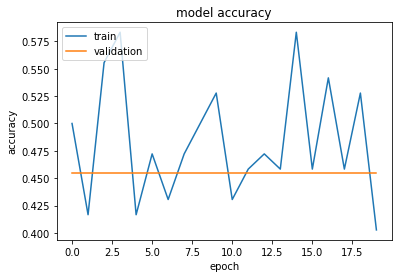

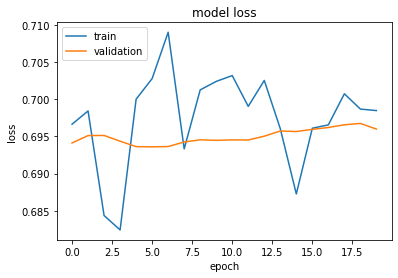

[<tf.Variable 'dense_8510672/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[ 3.45953070e-02,  1.21334858e-01, -3.19439948e-01,
         9.83312503e-02, -2.49196179e-02, -7.17775431e-03,
        -4.82038013e-05,  2.56039817e-02,  1.48758352e-01,
         2.70850156e-02, -1.50877878e-01, -3.19144279e-02,
         1.46710187e-01, -2.77599722e-01,  3.97495460e-03,
         6.54796362e-02,  7.33218491e-02, -1.73168048e-01,
        -4.15176240e-04, -3.30829546e-02,  1.95042640e-01,
         7.49081224e-02,  1.20119274e-01,  9.85729471e-02,
        -6.64369240e-02,  1.13428339e-01,  1.03612497e-01,
        -1.61377057e-01, -2.00786248e-01, -2.62967229e-01,
        -3.42158042e-03, -4.02554311e-02, -9.94504895e-03,
        -2.39558995e-01, -5.96795157e-02, -1.81927994e-01,
        -1.23075776e-01, -5.03570288e-02,  1.96756437e-01,
         1.37879089e-01, -5.09185670e-03,  1.85698550e-02,
        -2.96540428e-02, -4.01594751e-02, -7.73219466e-02,
         1.76143274e-02, -7.25260004e-0

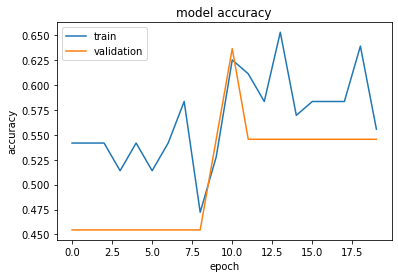

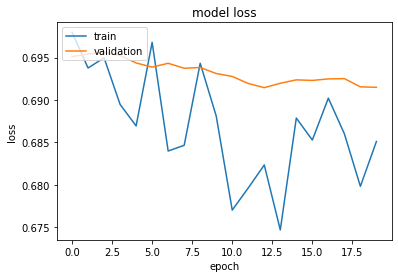

[<tf.Variable 'dense_8795836/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[ 3.07665933e-02,  1.16128646e-01, -3.19439948e-01,
         9.45842341e-02, -2.49196179e-02, -7.17775431e-03,
        -4.82038013e-05,  4.93622534e-02,  1.59546524e-01,
         2.51610596e-02, -1.50877878e-01, -4.28042188e-02,
         1.58830062e-01, -2.77599722e-01,  6.47065928e-03,
         6.21721260e-02,  7.05587417e-02, -1.73168048e-01,
        -4.15176240e-04, -4.37875241e-02,  1.95395604e-01,
         7.10137039e-02,  1.14716671e-01,  9.08764377e-02,
        -6.64369240e-02,  1.26826391e-01,  9.55320895e-02,
        -1.61377057e-01, -2.00786248e-01, -2.62967229e-01,
         3.96126532e-04, -4.21227440e-02, -2.45377608e-02,
        -2.39558995e-01, -5.62904365e-02, -1.81927994e-01,
        -1.23075776e-01, -5.03570288e-02,  1.89897090e-01,
         1.47731930e-01, -5.09185670e-03, -6.95472234e-04,
        -3.02177928e-02, -4.01594751e-02, -7.73219466e-02,
         5.09903114e-03, -8.07974786e-0

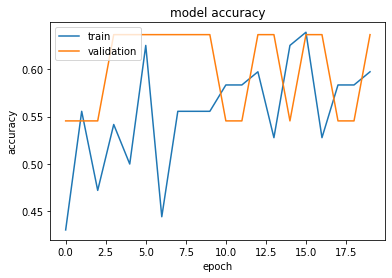

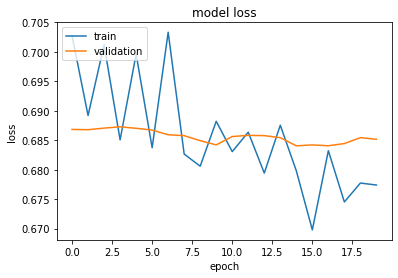

[<tf.Variable 'dense_9080960/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[ 3.06774303e-02,  1.17058083e-01, -3.19439948e-01,
         9.40739587e-02, -2.49196179e-02, -7.17775431e-03,
        -4.82038013e-05,  5.04490398e-02,  1.64549902e-01,
         1.62347518e-02, -1.50877878e-01, -5.37749566e-02,
         1.67380154e-01, -2.77599722e-01,  8.47037137e-03,
         6.03286326e-02,  7.37023577e-02, -1.73168048e-01,
        -4.15176240e-04, -7.01967953e-03,  1.95069477e-01,
         6.95416182e-02,  1.36247247e-01,  8.89462605e-02,
        -6.64369240e-02,  1.34861797e-01,  9.09556821e-02,
        -1.61377057e-01, -2.00786248e-01, -2.60808617e-01,
         3.50991637e-03, -4.21227440e-02, -2.45377608e-02,
        -2.40170032e-01, -6.41737282e-02, -1.81927994e-01,
        -1.23075776e-01, -4.88679558e-02,  1.77880198e-01,
         1.56835929e-01,  1.98735539e-02,  8.74409336e-04,
        -3.14923823e-02, -4.01594751e-02, -7.73219466e-02,
         5.93179325e-03, -8.41301531e-0

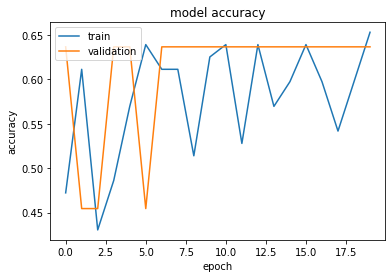

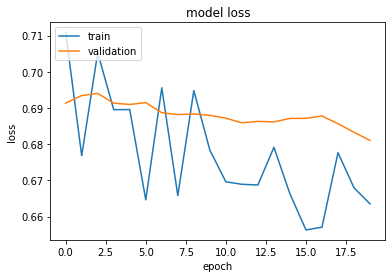

[<tf.Variable 'dense_9366044/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[ 2.90348250e-02,  1.20988034e-01, -3.19439948e-01,
         8.93173516e-02, -2.49196179e-02, -5.09875175e-03,
        -4.82038013e-05,  5.16303293e-02,  1.64654613e-01,
         1.26377372e-02, -1.50877878e-01, -5.92871606e-02,
         1.60722554e-01, -2.77599722e-01,  2.15754611e-03,
         5.66733479e-02,  7.21763298e-02, -1.73168048e-01,
        -4.15176240e-04, -2.49141008e-02,  1.77800164e-01,
         7.57783800e-02,  1.34585932e-01,  7.99929425e-02,
        -6.64369240e-02,  1.41399488e-01,  8.77685696e-02,
        -1.61377057e-01, -2.00786248e-01, -2.60449648e-01,
        -3.19259311e-03, -4.38676514e-02, -2.45377608e-02,
        -2.52565295e-01, -5.23434281e-02, -1.81927994e-01,
        -1.23075776e-01, -4.56083901e-02,  1.71981901e-01,
         1.72190905e-01,  4.45965417e-02,  1.44989491e-02,
        -3.16321924e-02, -4.01594751e-02, -7.73219466e-02,
         5.93179325e-03, -9.99993533e-0

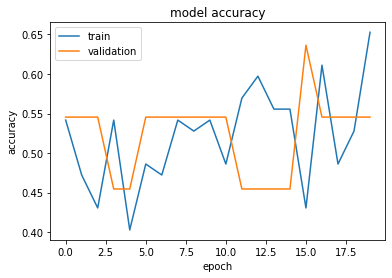

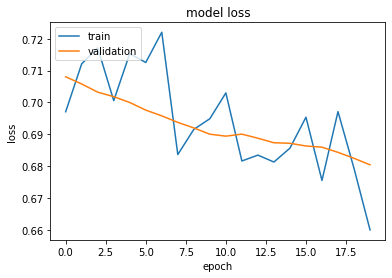

[<tf.Variable 'dense_9651088/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[ 2.04051379e-02,  1.36003286e-01, -3.19439948e-01,
         7.38859028e-02, -2.49196179e-02,  1.11109400e-02,
        -4.82038013e-05,  5.05543016e-02,  1.76469848e-01,
         5.49359526e-03, -1.50877878e-01, -5.62437437e-02,
         1.50968716e-01, -2.77599722e-01, -1.05759036e-03,
         4.48519476e-02,  8.33723843e-02, -1.73168048e-01,
        -4.15176240e-04, -2.99222469e-02,  1.76966384e-01,
         9.33348909e-02,  1.50525063e-01,  8.28187838e-02,
        -6.64369240e-02,  1.28811970e-01,  9.29168612e-02,
        -1.61377057e-01, -2.00786248e-01, -2.75277406e-01,
        -5.62255550e-03, -4.45116162e-02, -2.45377608e-02,
        -2.62011766e-01, -5.57795018e-02, -1.81927994e-01,
        -1.23075776e-01, -3.90673429e-02,  1.72628999e-01,
         1.60281941e-01,  5.33349998e-02, -8.37433431e-03,
        -3.79132181e-02, -4.01594751e-02, -7.71250725e-02,
         5.93179325e-03, -8.73290896e-0

In [ ]:
dnp_model_leuk, S_x_leuk, x_test_curr_leuk, x_val_curr_leuk = dnp(x_train_leuk, y_train_leuk, x_valid_leuk, y_valid_leuk, x_test_leuk, y_test_leuk, subtypes = 2)  ## For lung cancer

In [170]:
np.argmax(dnp_model_leuk.predict(x_test_curr_leuk), axis=-1)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

### Saving the ALL AML Cancer Model

In [169]:
dnp_model_leuk.save("dnpModelLeukemia")
%store S_x_leuk
%store x_test_curr_leuk
%store x_val_curr_leuk

INFO:tensorflow:Assets written to: dnpModelLeukemia/assets
Stored 'S_x_leuk' (ndarray)
Stored 'x_test_curr_leuk' (ndarray)
Stored 'x_val_curr_leuk' (ndarray)


### Evaluating ALL AML Cancer Model

In [168]:
temp1 = x_test_curr_leuk
print(temp1.shape)
dnp_model_leuk.evaluate(temp1, y_test_leuk, verbose = 2)

(11, 10)
1/1 - 0s - loss: 0.6232 - accuracy: 0.6364 - auc: 0.7438 - f1_m: 0.6364


[0.6232478022575378,
 0.6363636255264282,
 0.7438017129898071,
 0.6363635659217834]

### Loading The Saved ALL AML Cancer Model

In [ ]:
reconstructed_leuk_dnp_model = keras.models.load_model("dnpModelLeukemia", custom_objects={'f1_m':f1_m})
%store -r S_x_leuk
%store -r x_test_curr_leuk
%store -r x_val_curr_leuk

### Calling DNP for Prostate Cancer

Epoch 1/15
3/3 [==============================] - 1s 158ms/step - loss: 0.6943 - accuracy: 0.4922 - auc: 0.4922 - f1_m: 0.5026 - val_loss: 0.6967 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 2/15
3/3 [==============================] - 0s 32ms/step - loss: 0.6925 - accuracy: 0.5234 - auc: 0.4930 - f1_m: 0.5234 - val_loss: 0.6963 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 3/15
3/3 [==============================] - 0s 28ms/step - loss: 0.6941 - accuracy: 0.4922 - auc: 0.4922 - f1_m: 0.4922 - val_loss: 0.6960 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 4/15
3/3 [==============================] - 0s 28ms/step - loss: 0.6916 - accuracy: 0.5430 - auc: 0.5430 - f1_m: 0.5273 - val_loss: 0.6950 - val_accuracy: 0.4545 - val_auc: 0.4545 - val_f1_m: 0.4545
Epoch 5/15
3/3 [==============================] - 0s 198ms/step - loss: 0.6939 - accuracy: 0.4844 - auc: 0.4719 - f1_m: 0.4948 - val_loss: 0.6952 - val_accuracy: 0.4545 - val_auc:

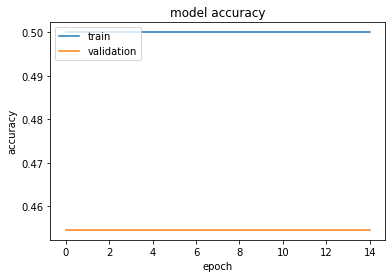

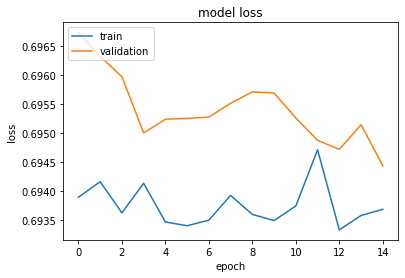

[<tf.Variable 'dense_9468052/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[-0.10949612, -0.15328239, -0.01998939,  0.10880938,  0.10111994,
        -0.23149602, -0.09931128, -0.0115978 ,  0.07411439,  0.08761735,
        -0.22351626, -0.29972383, -0.17811957,  0.07698669, -0.08109918,
         0.09331939, -0.10391364, -0.22899164, -0.26223645, -0.066587  ,
         0.22187541,  0.06827949, -0.07377311,  0.10673662,  0.22210337,
        -0.13275254,  0.16179685,  0.20887567, -0.13006157,  0.26695302,
        -0.16864203, -0.03517266,  0.00865352, -0.1395158 ,  0.01166363,
         0.0917277 , -0.05916776,  0.21619849, -0.02085067,  0.27670893,
         0.08859165,  0.1786595 , -0.05040275,  0.21157019,  0.07833323,
        -0.16908233,  0.03060817,  0.01431163, -0.0610451 ,  0.13569376,
         0.22645073,  0.0582208 , -0.13182285, -0.0699738 , -0.10099072,
        -0.20883888,  0.20557879, -0.07158799, -0.17892176, -0.15543143,
         0.05045576, -0.10928737, -0.02828611,  

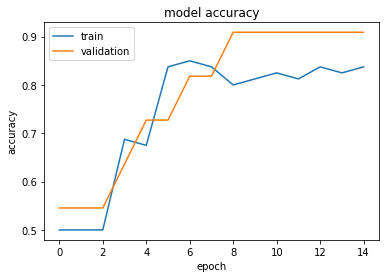

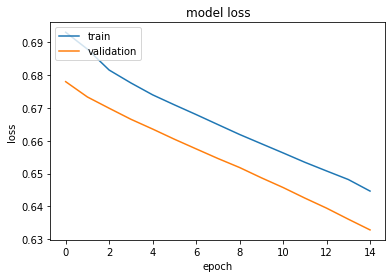

[<tf.Variable 'dense_9826016/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[-0.10949612, -0.15328239, -0.00744862,  0.1514768 ,  0.11244589,
        -0.23149602, -0.09931128, -0.0115978 ,  0.06547935,  0.07733993,
        -0.22351626, -0.29972383, -0.17797895,  0.07849123, -0.08109918,
         0.09775548, -0.10391364, -0.22899164, -0.26223645, -0.066587  ,
         0.2334423 ,  0.04873261, -0.07239477,  0.11048386,  0.23252688,
        -0.15976283,  0.17186555,  0.19785467, -0.13006157,  0.2774147 ,
        -0.16864203, -0.08485039,  0.00665844, -0.15284492, -0.00049031,
         0.10063073, -0.06120415,  0.21599075, -0.02085067,  0.27590203,
         0.08652576,  0.18380266, -0.05040275,  0.22573881,  0.09236486,
        -0.16908233,  0.03851053,  0.00514258, -0.0610451 ,  0.11985708,
         0.21659048,  0.05276123, -0.13182285, -0.0699738 , -0.10099072,
        -0.20763576,  0.21802239, -0.07158799, -0.1687604 , -0.15543143,
         0.04224569, -0.10928737, -0.02828611,  

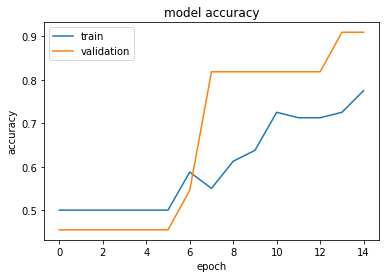

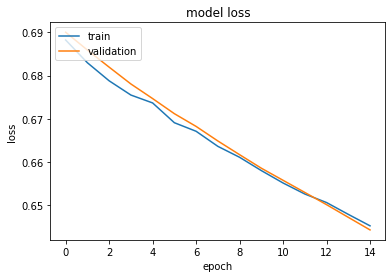

[<tf.Variable 'dense_10183920/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[-1.09496117e-01, -1.49162844e-01,  3.35118151e-03,
         1.44227296e-01,  1.21573575e-01, -2.31496021e-01,
        -9.72151458e-02, -1.15978047e-02,  7.36153349e-02,
         9.66756791e-02, -2.23516256e-01, -2.99723834e-01,
        -1.77978948e-01,  7.51763210e-02, -8.10991824e-02,
         9.93861631e-02, -1.03913642e-01, -2.28991643e-01,
        -2.62236446e-01, -6.65870011e-02,  2.26887345e-01,
         4.09362502e-02, -9.89868417e-02,  1.14664733e-01,
         2.29323387e-01, -1.59762830e-01,  1.80952400e-01,
         1.95760816e-01, -1.30061567e-01,  2.73871690e-01,
        -1.68642029e-01, -8.83656219e-02,  2.60497537e-03,
        -1.33508623e-01, -4.90306120e-04,  1.01129048e-01,
        -6.21354505e-02,  2.16099888e-01, -1.22855250e-02,
         2.71928430e-01,  8.18865895e-02,  1.85328826e-01,
        -4.92208153e-02,  2.39718482e-01,  7.81296864e-02,
        -1.69082329e-01,  4.01435979e-

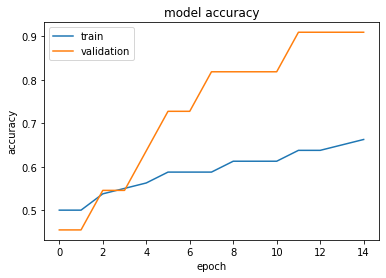

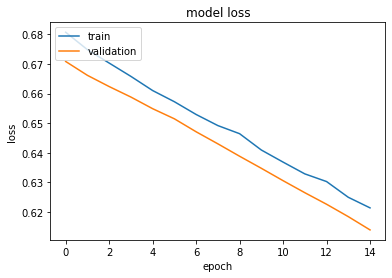

[<tf.Variable 'dense_10541764/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[-0.10949612, -0.1415472 , -0.0085469 ,  0.15025093,  0.14278287,
        -0.23149602, -0.11183869, -0.0115978 ,  0.06710979,  0.09599193,
        -0.22351626, -0.29972383, -0.17797895,  0.09764678, -0.08109918,
         0.09998821, -0.10391364, -0.22832392, -0.26223645, -0.066587  ,
         0.21625091,  0.02842603, -0.09898684,  0.11567821,  0.23099424,
        -0.15976283,  0.177654  ,  0.20463936, -0.13006157,  0.28359088,
        -0.16864203, -0.08918364, -0.00274068, -0.1352477 , -0.02424363,
         0.10011375, -0.06990179,  0.2117289 , -0.02390303,  0.2753064 ,
         0.09201439,  0.19325434, -0.05289128,  0.25909275,  0.07584746,
        -0.16908233,  0.05893435, -0.00256949, -0.05039132,  0.10717782,
         0.22502534,  0.04557126, -0.13182285, -0.0699738 , -0.10099072,
        -0.19143403,  0.22694814, -0.07621785, -0.15747921, -0.15554348,
         0.04600985, -0.10928737, -0.02828611, 

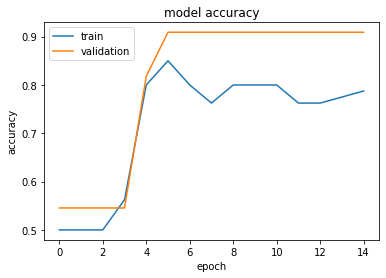

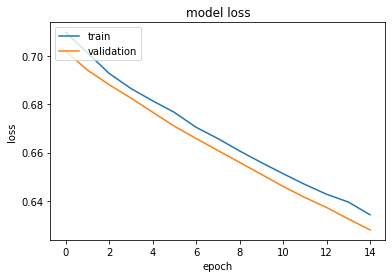

[<tf.Variable 'dense_10899548/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.10949612, -0.15007576, -0.0137482 ,  0.15619454,  0.14623876,
        -0.23149602, -0.11183869, -0.0115978 ,  0.06477197,  0.07824077,
        -0.22351626, -0.29972383, -0.17797895,  0.1014651 , -0.08109918,
         0.10142165, -0.10391364, -0.22613388, -0.26223645, -0.066587  ,
         0.22472306,  0.04362455, -0.10460155,  0.1142541 ,  0.22808523,
        -0.15976283,  0.1715815 ,  0.20293532, -0.13006157,  0.28372675,
        -0.16864203, -0.08997617, -0.0078176 , -0.1352477 , -0.02116681,
         0.0938427 , -0.07474028,  0.21503524, -0.02670351,  0.27916306,
         0.11080787,  0.2057086 , -0.05911052,  0.26454827,  0.07639533,
        -0.16908233,  0.08627442, -0.00076355, -0.05441497,  0.09793673,
         0.2285641 ,  0.04208983, -0.13182285, -0.0699738 , -0.10099123,
        -0.18663147,  0.235367  , -0.08345889, -0.16485392, -0.15554348,
         0.03729427, -0.10928737, -0.02828611, 

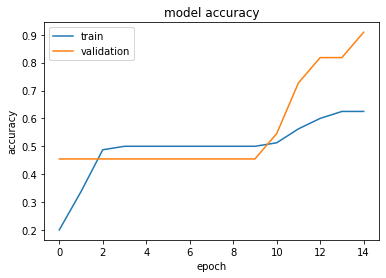

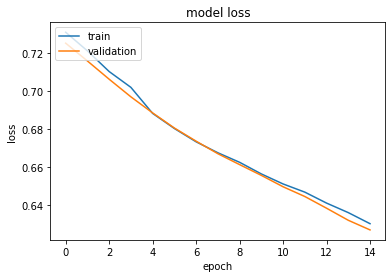

[<tf.Variable 'dense_11257272/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[-0.10949612, -0.12438902, -0.02001185,  0.1461297 ,  0.15561412,
        -0.23149602, -0.11183869, -0.0115978 ,  0.0722586 ,  0.08530086,
        -0.22351626, -0.29972383, -0.17797895,  0.09414811, -0.08109918,
         0.09763823, -0.10391364, -0.22460802, -0.26223645, -0.0743155 ,
         0.21766745,  0.03180202, -0.10460155,  0.1179952 ,  0.24391115,
        -0.15976283,  0.17888632,  0.21096416, -0.13006157,  0.27041325,
        -0.16930367, -0.08001962, -0.02487422, -0.1352477 , -0.01671404,
         0.0984881 , -0.08558144,  0.20673315, -0.01654767,  0.28071946,
         0.10832971,  0.21339978, -0.05467719,  0.24575599,  0.06368136,
        -0.16908233,  0.08131935, -0.0065028 , -0.04866864,  0.09362967,
         0.23187411,  0.03799781, -0.13182285, -0.0699738 , -0.10099123,
        -0.18663147,  0.22532867, -0.07232686, -0.17347613, -0.15554348,
         0.02026063, -0.10928737, -0.02828611, 

In [70]:
dnp_model_pros, S_x_pros, x_test_curr_pros, x_val_curr_pros = dnp(x_train_pros, y_train_pros, x_valid_pros, y_valid_pros, x_test_pros, y_test_pros, subtypes = 2)  ## For lung cancer

### Saving Prostate Cancer model

In [74]:
dnp_model_pros.save("dnpModelPros")
%store S_x_pros
%store x_test_curr_pros
%store x_val_curr_pros

INFO:tensorflow:Assets written to: dnpModelPros/assets
Stored 'S_x_pros' (ndarray)
Stored 'x_test_curr_pros' (ndarray)
Stored 'x_val_curr_pros' (ndarray)


### Evaluating Prostate Cancer model

In [73]:
temp1 = x_test_curr_pros
print(temp1.shape)
dnp_model_pros.evaluate(temp1, y_test_pros, verbose = 2)

(11, 6)
1/1 - 0s - loss: 0.5829 - accuracy: 0.8182 - auc: 0.8843 - f1_m: 0.8182


[0.5828900933265686,
 0.8181818127632141,
 0.8842974901199341,
 0.8181817531585693]

### Loading the saved Prostate Cancer Model

In [259]:
reconstructed_pros_dnp_model = keras.models.load_model("dnpModelPros", custom_objects={'f1_m':f1_m})
%store -r S_x_pros
%store -r x_test_curr_pros
%store -r x_val_curr_pros

### Testing DNP model with features selected using PCA

In [365]:
from sklearn.decomposition import PCA

## For lung Cancer
pca_lung = PCA(n_components=10)
principalComponents_lung_train = pca_lung.fit_transform(x_train_lung)

principalComponents_lung_valid = pca_lung.transform(x_valid_lung)
principalComponents_lung_test = pca_lung.transform(x_test_lung)

## For prostate Cancer
pca_pros = PCA(n_components=10)
principalComponents_pros_train = pca_pros.fit_transform(x_train_pros)

principalComponents_pros_valid = pca_pros.transform(x_valid_pros)
principalComponents_pros_test = pca_pros.transform(x_test_pros)

## For Braest Cancer
pca_breast = PCA(n_components=10)
principalComponents_breast_train = pca_breast.fit_transform(x_train)

principalComponents_breast_valid = pca_breast.transform(x_valid)
principalComponents_breast_test = pca_breast.transform(x_test)

In [389]:
def dnpOnPCAComponents(x_train, y_train, x_valid, y_valid, x_test, y_test, subtypes):
    
    S_size = 1
    C_size = 9
    S_x = x_train[:, 0].reshape(x_train.shape[0], 1)
    S_y = y_train
    C_x = x_train[:, 1:].reshape(x_train.shape[0], 9)
    C_y = y_train
    
    x_val_curr = x_valid[:, 0].reshape(x_valid.shape[0], 1) 
    x_val_rem = x_valid[:, 1:].reshape(x_valid.shape[0], 9) 
    
    x_test_curr = x_test[:, 0].reshape(x_test.shape[0], 1)
    x_test_rem = x_test[:, 1:].reshape(x_test.shape[0], 9) 
    
    k = 10
    
    prevModel = None
    featureToAdd = 0
    
    ## prevWeightMatrix = np.zeros((1, 100))  ## shape is (1, number of nodes in first hidden layer)
    
    while(True): ## S_size <= k
        
        model = build_a_subnetwork(S_size, prevModel, subtypes)
        
        opt = keras.optimizers.Adagrad(learning_rate=0.01)
        model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy", "AUC", f1_m])
        model.fit(S_x, S_y, epochs = 10, validation_data=(x_val_curr, y_valid)) 
        ## callbacks = EarlyStopping(monitor="val_loss", verbose = 1, patience = 2)
        
        plot(model.history)
        
        ##print(model.summary())
        
        ## prevWeightMatrix = model.layers[0].weights[0]
        
        prevModel = model
        
        print(model.layers[0].weights)
        
#         print(prevWeightMatrix)

        if(S_size == k):
            return model
        
        featureToAdd, feature = selectNewFeature(model, C_x, C_y, C_size, S_x, S_y, S_size, subtypes)
        
        print("Feature to add \n", featureToAdd)
        
#         break
        
        S_size += 1
        C_size -= 1
        
        
        ## Updating x_train
        columnToAdd = C_x[:, featureToAdd].reshape(-1, 1)
        
        S_x = np.append(S_x, columnToAdd, axis = 1)
        C_x = np.delete(C_x, featureToAdd, 1)
        
        ## Updating x_valid
        validColmnToAdd = x_val_rem[:, featureToAdd].reshape(-1, 1)
        
        x_val_curr = np.append(x_val_curr, validColmnToAdd, axis = 1)
        x_val_rem = np.delete(x_val_rem, featureToAdd, 1)
        
#         ## Updating x_test 
        testColmnToAdd = x_test_rem[:, featureToAdd].reshape(-1, 1)
        
        x_test_curr = np.append(x_test_curr, testColmnToAdd, axis = 1)
        x_test_rem = np.delete(x_test_rem, featureToAdd, 1)
        
#         featureToAdd += 1
        
        
#     return model, x_test_curr

### Running Lung, Cancer and Prostate Cancer Datasets on DNP model with PCA components

Epoch 1/10
6/6 [==============================] - 2s 167ms/step - loss: 1.5201 - accuracy: 0.6421 - auc: 0.8065 - f1_m: 0.0111 - val_loss: 1.5376 - val_accuracy: 0.5238 - val_auc: 0.6664 - val_f1_m: 0.0833
Epoch 2/10
6/6 [==============================] - 0s 37ms/step - loss: 1.3796 - accuracy: 0.7289 - auc: 0.8445 - f1_m: 0.1059 - val_loss: 1.5719 - val_accuracy: 0.5238 - val_auc: 0.6556 - val_f1_m: 0.0800
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 1.2662 - accuracy: 0.7125 - auc: 0.8411 - f1_m: 0.1883 - val_loss: 1.6156 - val_accuracy: 0.5238 - val_auc: 0.6485 - val_f1_m: 0.0714
Epoch 4/10
6/6 [==============================] - 0s 29ms/step - loss: 1.2488 - accuracy: 0.7002 - auc: 0.8214 - f1_m: 0.2733 - val_loss: 1.6578 - val_accuracy: 0.5238 - val_auc: 0.6457 - val_f1_m: 0.1935
Epoch 5/10
6/6 [==============================] - 0s 35ms/step - loss: 1.1966 - accuracy: 0.7052 - auc: 0.8317 - f1_m: 0.3803 - val_loss: 1.6048 - val_accuracy: 0.4286 - val_auc: 

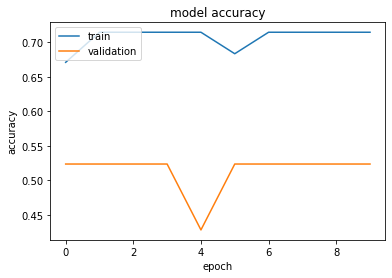

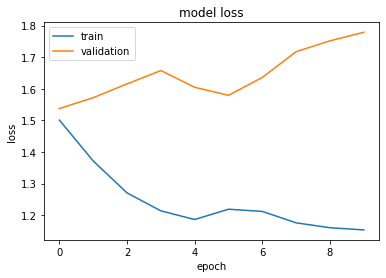

[<tf.Variable 'dense_768975/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[-0.06175696, -0.06314115,  0.15767893,  0.15364034,  0.22034554,
        -0.22871906, -0.22855555,  0.1170445 , -0.11340872, -0.1660867 ,
        -0.27495003, -0.08241154,  0.00334916,  0.01392533,  0.01081892,
        -0.34779137,  0.19134907,  0.02563784, -0.13326521, -0.17156072,
        -0.07858684, -0.12364151, -0.00244132,  0.07028869, -0.15770268,
        -0.29300946,  0.26240745,  0.02743298, -0.0819473 ,  0.07710018,
         0.01614507,  0.06419989,  0.13851815,  0.23135138, -0.28657332,
         0.17309639, -0.11240391, -0.1285795 , -0.15583147,  0.25084358,
        -0.26673585,  0.26889855, -0.14630939, -0.00856366, -0.06862163,
        -0.04495436,  0.01895947, -0.24249846,  0.1563715 ,  0.29966623,
         0.05305208, -0.21283183, -0.13741387,  0.0638511 , -0.09978443,
        -0.09421998,  0.22022285, -0.1727438 ,  0.13284995,  0.2972641 ,
        -0.0536864 , -0.02222167, -0.00037254,  0

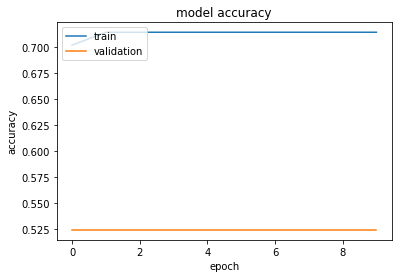

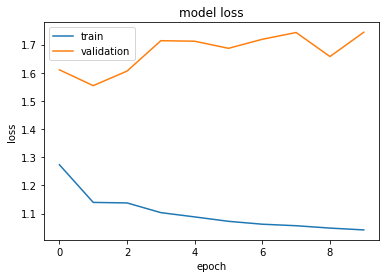

[<tf.Variable 'dense_769015/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[-6.25557080e-02, -7.72681534e-02,  1.73432022e-01,
         1.52909055e-01,  2.12170199e-01, -2.16406077e-01,
        -2.36620307e-01,  1.18685305e-01, -1.10721484e-01,
        -1.55063540e-01, -2.78825909e-01, -8.78571719e-02,
        -1.60151981e-02,  1.57963969e-02,  2.12544780e-02,
        -3.55775237e-01,  1.87536895e-01,  2.65687821e-03,
        -1.31057769e-01, -1.74884051e-01, -7.66983256e-02,
        -1.19154125e-01,  6.39682636e-03,  6.77774101e-02,
        -1.64840654e-01, -2.92537093e-01,  2.59920359e-01,
         3.06839645e-02, -8.95720124e-02,  7.35617056e-02,
         9.84634971e-05,  6.74528480e-02,  1.37193441e-01,
         2.14683875e-01, -2.71770179e-01,  1.79469392e-01,
        -1.16496690e-01, -1.24052830e-01, -1.53467536e-01,
         2.38654673e-01, -2.82444239e-01,  2.67829746e-01,
        -1.55371040e-01, -1.13867619e-03, -6.43099770e-02,
        -4.21193242e-02,  2.48364154e-02

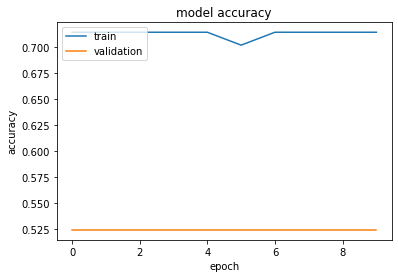

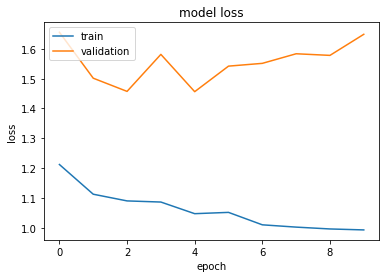

[<tf.Variable 'dense_769051/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[-5.62734008e-02, -7.57837668e-02,  1.89618349e-01,
         1.63982108e-01,  2.04486147e-01, -2.18810186e-01,
        -2.45508611e-01,  1.24317892e-01, -1.12327144e-01,
        -1.60338044e-01, -2.88300127e-01, -1.25803500e-01,
        -1.02162538e-02,  9.60638653e-03,  1.41932294e-02,
        -3.52804452e-01,  1.84016585e-01,  8.16362537e-03,
        -1.50269151e-01, -1.59503087e-01, -9.17396396e-02,
        -1.08041205e-01,  1.57441869e-02,  6.60324022e-02,
        -1.66599706e-01, -3.01112026e-01,  2.77026653e-01,
         2.85423752e-02, -1.03582367e-01,  6.10420331e-02,
         3.96869890e-03,  6.94217309e-02,  1.46160036e-01,
         2.06907451e-01, -2.60382503e-01,  1.87227175e-01,
        -1.28893465e-01, -1.20833673e-01, -1.62422031e-01,
         2.26917341e-01, -2.87272036e-01,  2.58853048e-01,
        -1.74071863e-01,  1.49091855e-02, -5.02503403e-02,
        -3.38416360e-02,  1.17110210e-02

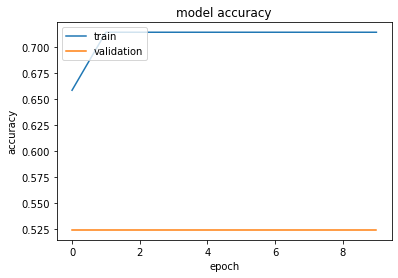

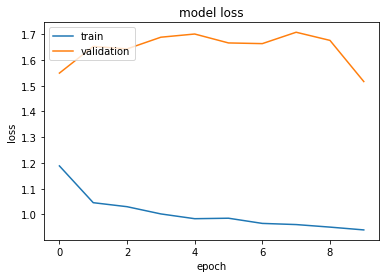

[<tf.Variable 'dense_769083/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[-0.03223218, -0.0545303 ,  0.1878098 ,  0.16053577,  0.20021746,
        -0.2094933 , -0.26166284,  0.12538877, -0.11331434, -0.15868933,
        -0.27953562, -0.14198011,  0.00719181, -0.0027917 , -0.00809258,
        -0.3565405 ,  0.18630725,  0.0116232 , -0.14992626, -0.14816861,
        -0.08180457, -0.10972197,  0.0253025 ,  0.07324059, -0.16703612,
        -0.2997472 ,  0.25977668,  0.05226381, -0.11136665,  0.06803648,
         0.02062652,  0.07268289,  0.13711476,  0.21301046, -0.27114484,
         0.19587718, -0.1178556 , -0.12676536, -0.16769488,  0.22594641,
        -0.27206308,  0.25607425, -0.15991452,  0.00193319, -0.03415171,
        -0.03218437, -0.00073102, -0.25491154,  0.14386328,  0.31932527,
         0.03661151, -0.23323321, -0.1276832 ,  0.07314375, -0.11563417,
        -0.08471404,  0.22789775, -0.16800632,  0.13785495,  0.3202586 ,
        -0.06381491, -0.03097531, -0.01077637,  0

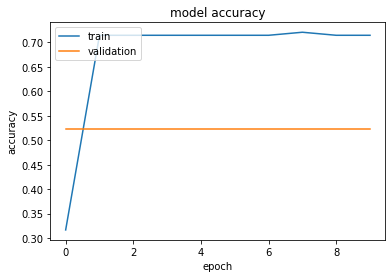

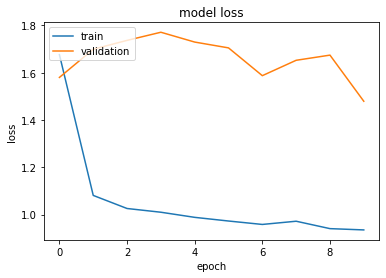

[<tf.Variable 'dense_769111/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.03274474, -0.06307633,  0.19210875,  0.14612235,  0.18883333,
        -0.2122007 , -0.2604836 ,  0.11762869, -0.10180829, -0.162712  ,
        -0.2821491 , -0.13369745,  0.00071339, -0.00844141, -0.0206625 ,
        -0.35118556,  0.174586  ,  0.01466176, -0.14377847, -0.13323493,
        -0.07779668, -0.10272393,  0.0232006 ,  0.07745038, -0.16613801,
        -0.3071107 ,  0.27433062,  0.04512287, -0.11241324,  0.05650504,
         0.03628512,  0.07515701,  0.13815258,  0.20137265, -0.28573558,
         0.18272862, -0.12468302, -0.11388896, -0.14722043,  0.20895754,
        -0.2638748 ,  0.25770116, -0.15325084,  0.00283009, -0.04736901,
        -0.02393771, -0.00897064, -0.29536387,  0.1462371 ,  0.3009885 ,
         0.03325152, -0.24248889, -0.13091417,  0.05225651, -0.11290672,
        -0.08482249,  0.20602104, -0.17212492,  0.1417782 ,  0.31465185,
        -0.07670359, -0.04616923,  0.00724929,  0

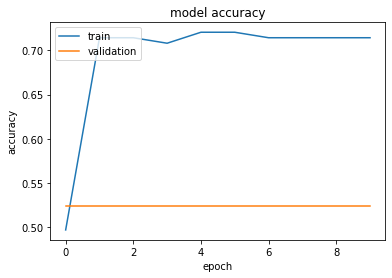

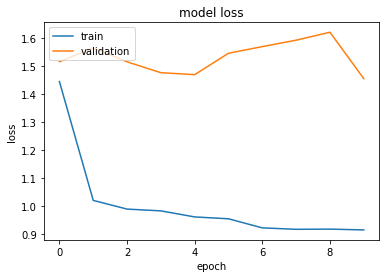

[<tf.Variable 'dense_769135/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[-4.66433801e-02, -5.68884164e-02,  1.99464157e-01,
         1.57752872e-01,  1.95995286e-01, -1.95740402e-01,
        -2.59100705e-01,  1.23567358e-01, -1.13221586e-01,
        -1.46444172e-01, -2.65737385e-01, -1.19949810e-01,
        -2.39998614e-03, -3.50246613e-04, -3.08782235e-03,
        -3.58637005e-01,  1.74081564e-01,  1.85257439e-02,
        -1.41207635e-01, -1.15919366e-01, -7.91330934e-02,
        -9.92369801e-02,  1.69310514e-02,  8.65117162e-02,
        -1.68226436e-01, -2.99568087e-01,  2.72961259e-01,
         5.48090935e-02, -1.05705626e-01,  4.50469032e-02,
         4.68837395e-02,  7.98149407e-02,  1.33046582e-01,
         2.02112094e-01, -2.77020037e-01,  1.86948776e-01,
        -1.26065642e-01, -9.00160149e-02, -1.34348229e-01,
         1.99009806e-01, -2.62134761e-01,  2.35174105e-01,
        -1.44549429e-01,  1.95909664e-02, -3.66560183e-02,
        -4.73748008e-03,  2.38762470e-03

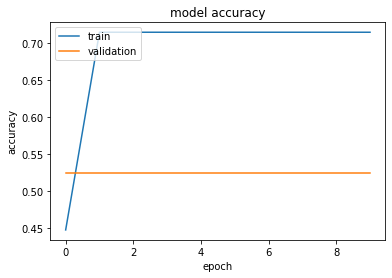

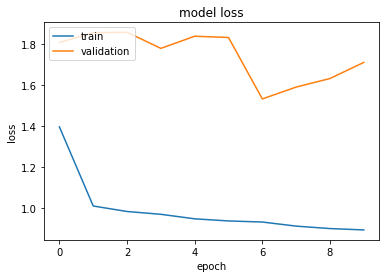

[<tf.Variable 'dense_769155/kernel:0' shape=(7, 100) dtype=float32, numpy=
array([[-0.04137487, -0.0546901 ,  0.19741799,  0.17671889,  0.1984129 ,
        -0.19954482, -0.25865793,  0.10673505, -0.13609043, -0.14440314,
        -0.2609975 , -0.13588178,  0.01189107, -0.01053515, -0.01098871,
        -0.34381557,  0.17699862, -0.00954221, -0.14882071, -0.11379512,
        -0.08934063, -0.10107535,  0.00212766,  0.08254828, -0.16329432,
        -0.2978215 ,  0.2938954 ,  0.02888979, -0.10740053,  0.03607855,
         0.05674011,  0.05394961,  0.1489624 ,  0.20107181, -0.26546863,
         0.19146596, -0.1350196 , -0.09678739, -0.15100943,  0.1857983 ,
        -0.26639965,  0.23966005, -0.14735362,  0.01403131, -0.02946084,
        -0.00412436,  0.00411358, -0.30838454,  0.1399172 ,  0.29254812,
         0.03920553, -0.24093021, -0.14611088,  0.02113768, -0.12024278,
        -0.07601228,  0.20237805, -0.1937844 ,  0.1684819 ,  0.32085684,
        -0.07463599, -0.07062228,  0.02585245,  0

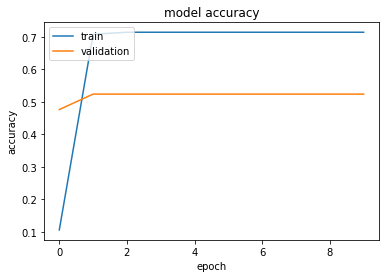

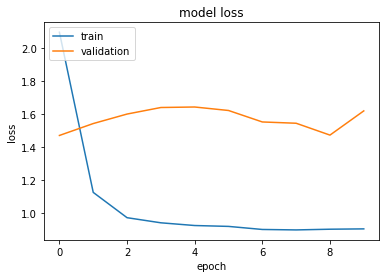

[<tf.Variable 'dense_769171/kernel:0' shape=(8, 100) dtype=float32, numpy=
array([[-3.26814577e-02, -3.38004045e-02,  1.98682785e-01,
         1.69655532e-01,  1.89442113e-01, -2.02487230e-01,
        -2.57712185e-01,  9.58278626e-02, -1.28000140e-01,
        -1.34887218e-01, -2.46732175e-01, -1.28705502e-01,
         6.90407911e-03, -1.77369528e-02, -1.79651603e-02,
        -3.41035634e-01,  1.92020923e-01,  8.70682206e-03,
        -1.48593217e-01, -1.13825060e-01, -8.13149214e-02,
        -8.19365084e-02,  7.81321619e-03,  8.89017805e-02,
        -1.61305875e-01, -2.95515507e-01,  2.95178056e-01,
         1.13257281e-02, -9.31934193e-02,  4.21823375e-02,
         5.61199486e-02,  6.87379390e-02,  1.56117782e-01,
         2.06596240e-01, -2.66103089e-01,  2.02707395e-01,
        -1.31407574e-01, -1.11614518e-01, -1.50926128e-01,
         1.73872486e-01, -2.68651456e-01,  2.43115857e-01,
        -1.53287619e-01,  7.64711387e-03, -4.06073481e-02,
         1.92302861e-03,  4.37106937e-03

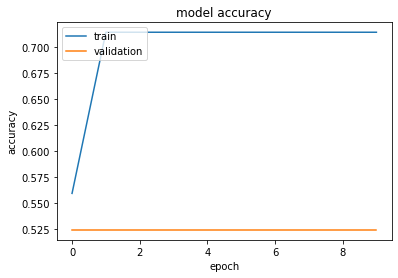

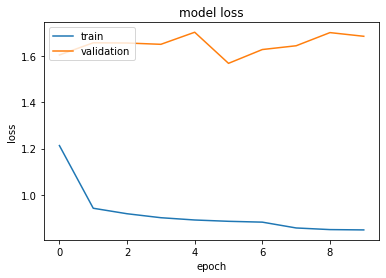

[<tf.Variable 'dense_769183/kernel:0' shape=(9, 100) dtype=float32, numpy=
array([[-3.50072458e-02, -3.31101194e-02,  1.87096909e-01,
         1.64878920e-01,  1.97431922e-01, -2.00897992e-01,
        -2.56554335e-01,  1.03794880e-01, -1.49621397e-01,
        -1.39737949e-01, -2.51871973e-01, -1.12207256e-01,
        -4.24561650e-03, -5.06901415e-03, -2.06987839e-02,
        -3.48137707e-01,  2.02082828e-01,  2.98789237e-02,
        -1.49827272e-01, -1.06037222e-01, -8.63501132e-02,
        -8.05321410e-02,  5.93021419e-03,  1.07786059e-01,
        -1.72121316e-01, -2.97990233e-01,  2.90728420e-01,
         1.39472792e-02, -9.15699750e-02,  3.71133648e-02,
         5.09768911e-02,  7.48099089e-02,  1.58975109e-01,
         2.19809309e-01, -2.70275891e-01,  2.07722113e-01,
        -1.47992522e-01, -9.16363522e-02, -1.42163366e-01,
         1.68409199e-01, -2.68114507e-01,  2.30848089e-01,
        -1.46918684e-01, -2.32885242e-03, -5.93739338e-02,
         2.02726517e-02,  1.93340611e-02

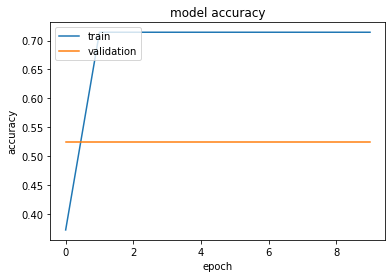

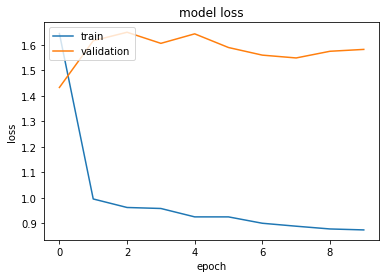

[<tf.Variable 'dense_769191/kernel:0' shape=(10, 100) dtype=float32, numpy=
array([[-2.72045992e-02, -4.69945334e-02,  1.91274807e-01,
         1.72087550e-01,  1.97807878e-01, -1.97865993e-01,
        -2.59317756e-01,  8.90189558e-02, -1.70493007e-01,
        -1.30922049e-01, -2.54096031e-01, -1.12244666e-01,
        -8.81764665e-03, -4.99535399e-03, -8.63004941e-03,
        -3.42571497e-01,  1.98674768e-01,  1.78536680e-02,
        -1.49730429e-01, -9.45661739e-02, -9.94420797e-02,
        -7.15466291e-02, -2.78817909e-03,  9.92505699e-02,
        -1.74529165e-01, -2.99344897e-01,  2.90413439e-01,
         8.55537318e-03, -8.74434039e-02,  1.94373317e-02,
         5.94571196e-02,  7.70567581e-02,  1.49465725e-01,
         2.21149445e-01, -2.72458643e-01,  1.96960315e-01,
        -1.58314630e-01, -8.93377885e-02, -1.38012990e-01,
         1.58769369e-01, -2.75206149e-01,  2.39172906e-01,
        -1.52835369e-01,  4.54934197e-04, -7.43626058e-02,
         9.41071194e-03,  2.40510777e-0

In [390]:
pca_model_lung = dnpOnPCAComponents(principalComponents_lung_train, y_train_lung, principalComponents_lung_valid, y_valid_lung, principalComponents_lung_test, y_test_lung, subtypes = 5)

Epoch 1/10
3/3 [==============================] - 2s 402ms/step - loss: 0.7523 - accuracy: 0.5703 - auc: 0.5313 - f1_m: 0.5599 - val_loss: 0.7588 - val_accuracy: 0.7273 - val_auc: 0.6529 - val_f1_m: 0.7273
Epoch 2/10
3/3 [==============================] - 0s 70ms/step - loss: 0.8300 - accuracy: 0.4266 - auc: 0.4524 - f1_m: 0.4453 - val_loss: 0.8791 - val_accuracy: 0.4545 - val_auc: 0.2686 - val_f1_m: 0.4545
Epoch 3/10
3/3 [==============================] - 0s 77ms/step - loss: 0.6981 - accuracy: 0.5992 - auc: 0.5704 - f1_m: 0.6107 - val_loss: 0.9107 - val_accuracy: 0.4545 - val_auc: 0.3388 - val_f1_m: 0.4545
Epoch 4/10
3/3 [==============================] - 0s 65ms/step - loss: 0.7312 - accuracy: 0.5836 - auc: 0.5425 - f1_m: 0.5951 - val_loss: 0.8115 - val_accuracy: 0.4545 - val_auc: 0.3388 - val_f1_m: 0.4545
Epoch 5/10
3/3 [==============================] - 0s 71ms/step - loss: 0.7919 - accuracy: 0.5391 - auc: 0.4923 - f1_m: 0.5495 - val_loss: 0.8508 - val_accuracy: 0.4545 - val_auc: 

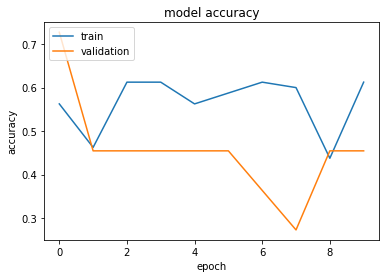

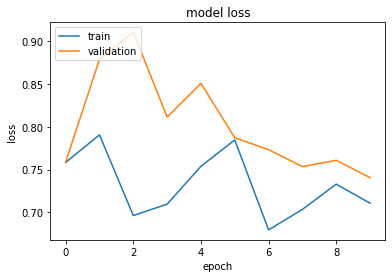

[<tf.Variable 'dense_769195/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[ 0.19364055,  0.18444186,  0.08657233, -0.04121705,  0.26049268,
         0.1053948 , -0.16221991,  0.15904073,  0.1227962 , -0.05209281,
        -0.08146579, -0.26165736,  0.06891139, -0.04881281,  0.07481748,
         0.07417303, -0.16793235, -0.19634886, -0.09370666, -0.02924316,
         0.17898904,  0.11327418, -0.07541753,  0.00754004, -0.07087339,
         0.30731976,  0.02618325, -0.10028097,  0.12641342,  0.23112714,
        -0.16457224, -0.04126265, -0.10957601,  0.20468502, -0.00951056,
         0.2375358 , -0.1617814 , -0.10354035,  0.0363953 ,  0.16764976,
        -0.05332819,  0.29775688, -0.00136928, -0.13803376,  0.0550811 ,
        -0.11290846, -0.0452903 , -0.14923103,  0.09386718, -0.06202416,
         0.11263192,  0.27344504, -0.06117058,  0.2999227 ,  0.18822065,
        -0.1090985 , -0.06205185,  0.19703594,  0.25880438, -0.07406358,
        -0.0790859 , -0.0917562 ,  0.01862335,  0

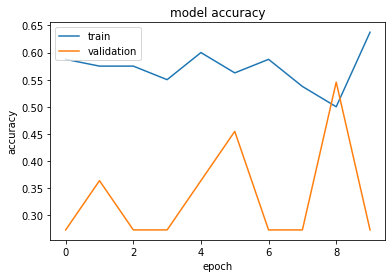

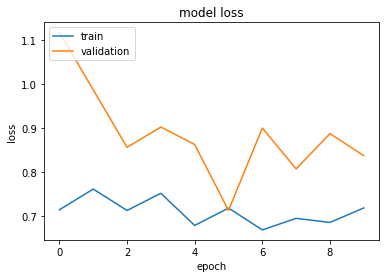

[<tf.Variable 'dense_769235/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[ 0.18641834,  0.18176119,  0.07850368, -0.04406969,  0.2482543 ,
         0.09774499, -0.16496474,  0.1457293 ,  0.11832695, -0.04930792,
        -0.08826561, -0.2653357 ,  0.07552487, -0.05125934,  0.07172012,
         0.07525972, -0.1673637 , -0.19455047, -0.09001566, -0.0225536 ,
         0.17227475,  0.11834659, -0.07324744,  0.00261229, -0.07318643,
         0.29766548,  0.01808178, -0.09840108,  0.12175094,  0.22957093,
        -0.16587888, -0.03134228, -0.10424994,  0.20662326, -0.0106504 ,
         0.23517141, -0.15099458, -0.09562685,  0.03048032,  0.15780607,
        -0.05939621,  0.28683576, -0.00228009, -0.13144933,  0.05488093,
        -0.11374409, -0.0518912 , -0.14820181,  0.0935196 , -0.05841722,
         0.11053924,  0.26890972, -0.06238147,  0.29391226,  0.17439896,
        -0.10872305, -0.05777971,  0.19162996,  0.24919407, -0.0747419 ,
        -0.08156401, -0.08866693,  0.02175169,  0

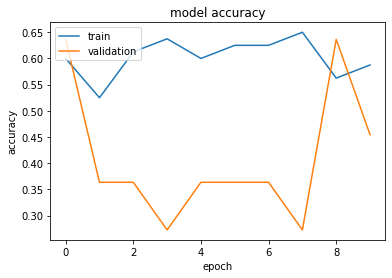

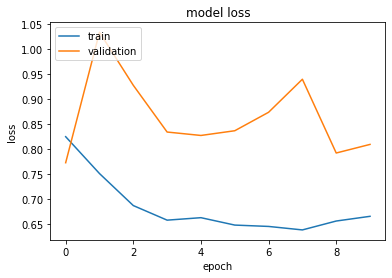

[<tf.Variable 'dense_769271/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[ 2.00927019e-01,  1.76026955e-01,  6.42810017e-02,
        -3.70316617e-02,  2.38173157e-01,  1.03710130e-01,
        -1.64390534e-01,  1.30979612e-01,  1.22452863e-01,
        -5.25134467e-02, -8.58710036e-02, -2.49157533e-01,
         7.67689124e-02, -5.82137369e-02,  5.32876104e-02,
         8.55809525e-02, -1.56824797e-01, -2.07085282e-01,
        -7.66310692e-02, -1.78162344e-02,  1.68524295e-01,
         1.19666353e-01, -7.27111846e-02,  1.92606058e-02,
        -7.38899186e-02,  3.00620377e-01,  2.08489224e-02,
        -9.76918340e-02,  1.22431740e-01,  2.14933097e-01,
        -1.62664890e-01, -3.25433835e-02, -1.06586523e-01,
         2.06740379e-01, -2.47070082e-02,  2.29579672e-01,
        -1.59698188e-01, -9.53046381e-02,  3.26689705e-02,
         1.38730839e-01, -4.88911234e-02,  2.77289659e-01,
         6.13060175e-03, -1.15706339e-01,  6.44503757e-02,
        -1.20445289e-01, -5.31795137e-02

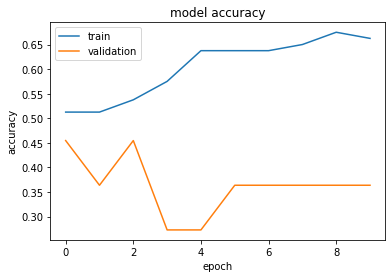

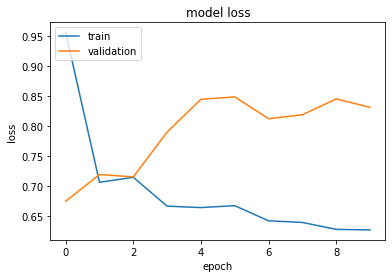

[<tf.Variable 'dense_769303/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[ 1.93500802e-01,  1.70558870e-01,  6.49276078e-02,
        -3.70746702e-02,  2.43250221e-01,  8.95335600e-02,
        -1.56163424e-01,  1.21915281e-01,  1.15647860e-01,
        -5.49030863e-02, -7.89707974e-02, -2.40937039e-01,
         7.95184299e-02, -7.38746077e-02,  5.70794493e-02,
         8.75639543e-02, -1.48027316e-01, -2.11646453e-01,
        -8.02316666e-02, -4.74957116e-02,  1.67779535e-01,
         1.18627816e-01, -6.63370043e-02, -3.61000421e-05,
        -6.54822662e-02,  3.04563940e-01,  1.60604976e-02,
        -9.72101539e-02,  1.27650246e-01,  2.03124359e-01,
        -1.68127611e-01, -1.81098152e-02, -1.00553535e-01,
         2.05529302e-01, -2.97089685e-02,  2.26947486e-01,
        -1.64092124e-01, -8.94990414e-02,  2.63114553e-02,
         1.25247151e-01, -4.11137454e-02,  2.70104468e-01,
        -4.95900400e-04, -1.15155496e-01,  6.11908324e-02,
        -1.29061535e-01, -5.71085475e-02

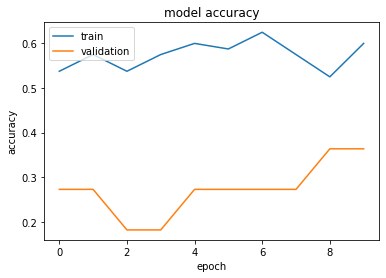

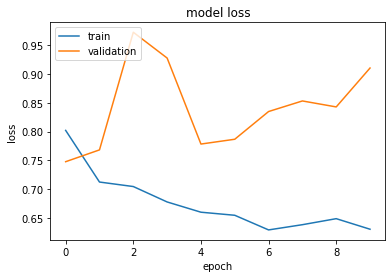

[<tf.Variable 'dense_769331/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[ 1.90079644e-01,  1.56416565e-01,  7.96266198e-02,
        -4.13878858e-02,  2.37883225e-01,  7.61533454e-02,
        -1.70878053e-01,  1.10496894e-01,  1.04821987e-01,
        -5.97279295e-02, -8.19937587e-02, -2.35275477e-01,
         8.24887156e-02, -7.92409107e-02,  5.42466342e-02,
         8.93421695e-02, -1.47649840e-01, -2.17278287e-01,
        -8.32535997e-02, -3.09875514e-02,  1.69740483e-01,
         1.20859124e-01, -5.80143370e-02,  9.11508966e-03,
        -5.62237948e-02,  3.00578505e-01,  5.41386101e-03,
        -8.43282491e-02,  1.33603305e-01,  2.04579413e-01,
        -1.64067045e-01, -3.49312983e-02, -1.12607837e-01,
         1.95152596e-01, -2.80256625e-02,  2.24465907e-01,
        -1.69349730e-01, -8.47655982e-02,  2.94265654e-02,
         1.13320485e-01, -2.87369527e-02,  2.77484924e-01,
        -1.03218481e-02, -1.09955654e-01,  5.97576760e-02,
        -1.29101142e-01, -5.54298609e-02

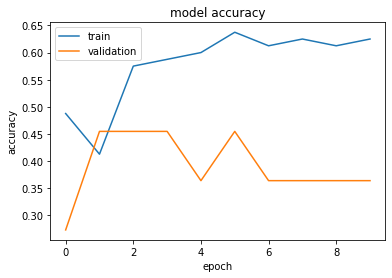

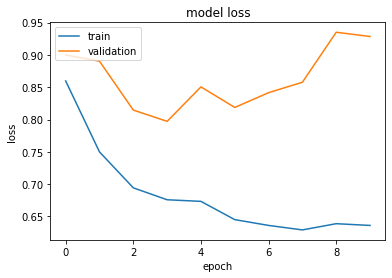

[<tf.Variable 'dense_769355/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[ 2.00328112e-01,  1.65343836e-01,  6.34362102e-02,
        -2.80516688e-02,  2.37963870e-01,  7.16926008e-02,
        -1.70586020e-01,  1.19112521e-01,  1.02658972e-01,
        -5.81088103e-02, -7.40022510e-02, -2.42117897e-01,
         8.95934328e-02, -9.46932808e-02,  4.83862497e-02,
         9.13656726e-02, -1.62275925e-01, -2.02085808e-01,
        -7.98376948e-02, -2.44189370e-02,  1.61410660e-01,
         1.25825062e-01, -5.56127802e-02,  1.28795588e-02,
        -4.60549183e-02,  2.97404617e-01,  4.87172650e-03,
        -1.02378801e-01,  1.23618357e-01,  1.88497707e-01,
        -1.70413733e-01, -2.56546494e-02, -1.11863352e-01,
         1.94261134e-01, -4.61122505e-02,  2.26621360e-01,
        -1.81992978e-01, -6.79401904e-02,  3.93149853e-02,
         1.10094972e-01, -3.42926718e-02,  2.72921890e-01,
         9.87532735e-03, -9.51378122e-02,  6.50515556e-02,
        -1.41026109e-01, -7.20377341e-02

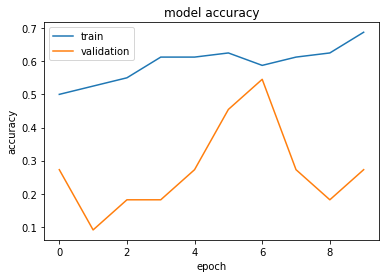

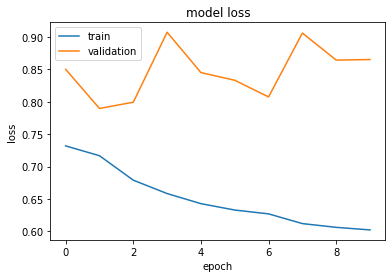

[<tf.Variable 'dense_769375/kernel:0' shape=(7, 100) dtype=float32, numpy=
array([[ 0.19487022,  0.1626733 ,  0.06980191, -0.01599073,  0.24120478,
         0.05978201, -0.15493356,  0.11485906,  0.1002752 , -0.06541672,
        -0.08195843, -0.23895738,  0.09854334, -0.10507062,  0.04393287,
         0.08855167, -0.150868  , -0.1999924 , -0.08248387,  0.00181285,
         0.1796595 ,  0.10839894, -0.0576668 ,  0.02420025, -0.03818241,
         0.29686546,  0.0126071 , -0.09382868,  0.1261693 ,  0.18947685,
        -0.17455275, -0.02457164, -0.1167327 ,  0.2067709 , -0.03294329,
         0.22408418, -0.1950005 , -0.06092919,  0.02703844,  0.10717376,
        -0.03875982,  0.26497763,  0.01866194, -0.10337894,  0.06285551,
        -0.13068214, -0.07707105, -0.1455266 ,  0.11238743, -0.03395055,
         0.10594659,  0.23081711, -0.05124665,  0.31027496,  0.14056616,
        -0.11097783, -0.04492954,  0.17938681,  0.24787745, -0.0453374 ,
        -0.05678714, -0.11682457, -0.01956896,  0

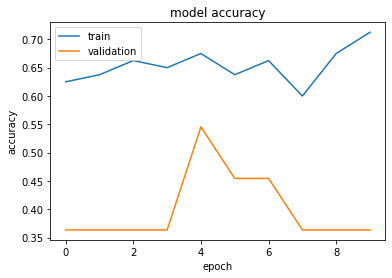

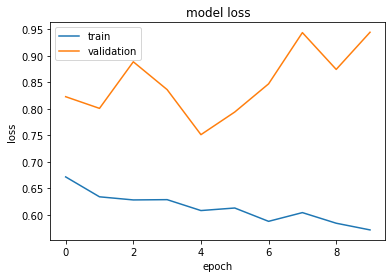

[<tf.Variable 'dense_769391/kernel:0' shape=(8, 100) dtype=float32, numpy=
array([[ 2.10392371e-01,  1.57533184e-01,  6.16642796e-02,
        -1.49519416e-02,  2.36417606e-01,  4.40094434e-02,
        -1.41759351e-01,  1.24218494e-01,  9.04245451e-02,
        -7.91207179e-02, -7.48512819e-02, -2.33654782e-01,
         9.75721702e-02, -9.70482454e-02,  3.07587348e-02,
         9.40721259e-02, -1.58043370e-01, -2.02203482e-01,
        -7.41535127e-02, -8.50999169e-03,  1.93682477e-01,
         9.99380276e-02, -6.05292991e-02,  2.76125520e-02,
        -2.71247476e-02,  2.79324919e-01,  1.56071074e-02,
        -8.56008828e-02,  1.31889060e-01,  1.81705445e-01,
        -1.68934658e-01, -4.32403125e-02, -1.11657463e-01,
         2.09846362e-01, -3.24404128e-02,  2.33618811e-01,
        -1.90851733e-01, -6.24574423e-02,  1.24899643e-02,
         8.44985619e-02, -4.66097817e-02,  2.74673551e-01,
         2.28421446e-02, -9.31084007e-02,  6.42541498e-02,
        -1.29552767e-01, -8.02799612e-02

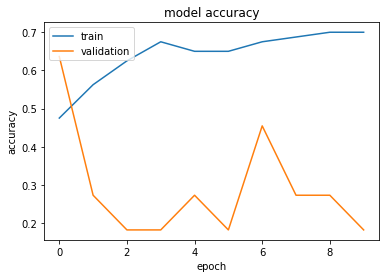

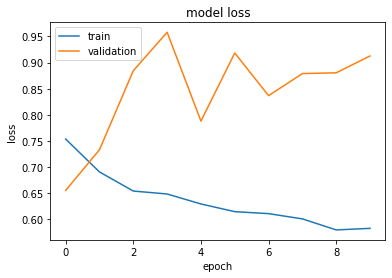

[<tf.Variable 'dense_769403/kernel:0' shape=(9, 100) dtype=float32, numpy=
array([[ 2.04998717e-01,  1.64970681e-01,  6.13851883e-02,
        -2.90995855e-02,  2.29947537e-01,  5.25572486e-02,
        -1.46977946e-01,  1.18872859e-01,  9.88281295e-02,
        -8.33438560e-02, -7.22871348e-02, -2.26954430e-01,
         1.09253801e-01, -1.03603430e-01,  1.74180884e-02,
         8.83368403e-02, -1.48519099e-01, -1.92794651e-01,
        -7.83047527e-02, -2.62657506e-03,  1.99826568e-01,
         8.48663077e-02, -7.37502128e-02,  1.21859582e-02,
        -1.09991990e-02,  2.68770814e-01,  3.05905635e-03,
        -7.81368688e-02,  1.43682688e-01,  1.83146775e-01,
        -1.57599837e-01, -3.05544101e-02, -1.13673411e-01,
         2.14479357e-01, -3.10565233e-02,  2.24997252e-01,
        -1.91658705e-01, -5.08629754e-02,  2.11404003e-02,
         8.94465521e-02, -3.79354693e-02,  2.68013358e-01,
         3.84627096e-02, -9.44111869e-02,  8.26019794e-02,
        -1.23133935e-01, -7.18057826e-02

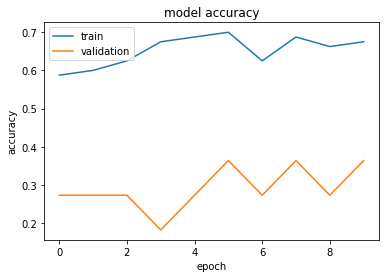

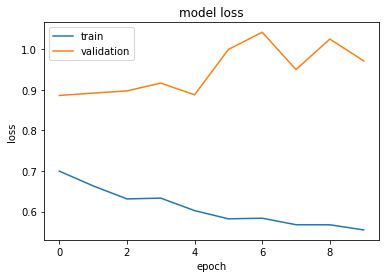

[<tf.Variable 'dense_769411/kernel:0' shape=(10, 100) dtype=float32, numpy=
array([[ 1.90931946e-01,  1.68911457e-01,  8.93385038e-02,
        -2.20809896e-02,  2.27026418e-01,  4.61174585e-02,
        -1.39548019e-01,  1.24074146e-01,  1.05056003e-01,
        -8.78507420e-02, -5.66702746e-02, -2.38849536e-01,
         1.07870057e-01, -1.02297321e-01,  4.09665005e-03,
         9.04734656e-02, -1.54739350e-01, -1.87642455e-01,
        -7.06848577e-02, -7.21185934e-03,  1.84415847e-01,
         9.42968726e-02, -7.62986466e-02,  2.20727716e-02,
        -1.88272297e-02,  2.76810557e-01, -9.37375589e-04,
        -9.54958275e-02,  1.33514538e-01,  1.65671334e-01,
        -1.48310006e-01, -1.17838979e-02, -1.17949151e-01,
         2.25890279e-01, -2.85928361e-02,  2.09553003e-01,
        -1.84859082e-01, -3.37953120e-02,  2.56049521e-02,
         7.89385810e-02, -2.81761754e-02,  2.65007257e-01,
         5.04604392e-02, -8.61506462e-02,  1.00754432e-01,
        -1.19493455e-01, -7.01578781e-0

In [392]:
pca_model_pros = dnpOnPCAComponents(principalComponents_pros_train, y_train_pros, principalComponents_pros_valid, y_valid_pros, principalComponents_pros_test, y_test_pros, subtypes = 2)

Epoch 1/10
15/15 [==============================] - 2s 68ms/step - loss: 1.3691 - accuracy: 0.3782 - auc: 0.5750 - f1_m: 0.0000e+00 - val_loss: 1.3209 - val_accuracy: 0.4483 - val_auc: 0.6495 - val_f1_m: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 16ms/step - loss: 1.3569 - accuracy: 0.3885 - auc: 0.5903 - f1_m: 0.0000e+00 - val_loss: 1.3277 - val_accuracy: 0.4483 - val_auc: 0.6263 - val_f1_m: 0.0303
Epoch 3/10
15/15 [==============================] - 0s 17ms/step - loss: 1.3530 - accuracy: 0.3845 - auc: 0.6011 - f1_m: 0.0306 - val_loss: 1.3406 - val_accuracy: 0.4483 - val_auc: 0.6057 - val_f1_m: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 17ms/step - loss: 1.3400 - accuracy: 0.4114 - auc: 0.6105 - f1_m: 0.0000e+00 - val_loss: 1.3476 - val_accuracy: 0.4483 - val_auc: 0.6040 - val_f1_m: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 13ms/step - loss: 1.3398 - accuracy: 0.4118 - auc: 0.6204 - f1_m: 0.0010 - val_loss: 1.3411 -

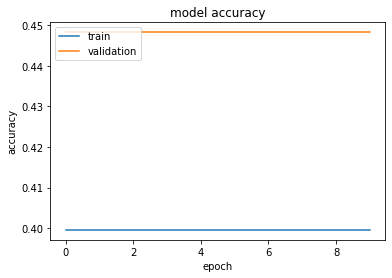

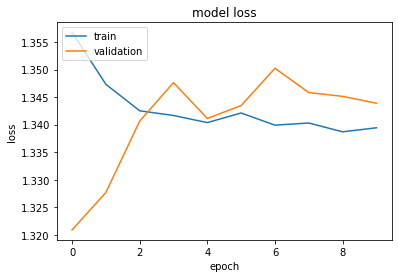

[<tf.Variable 'dense_769415/kernel:0' shape=(1, 100) dtype=float32, numpy=
array([[-0.04290429, -0.01085303,  0.14195758, -0.02642007,  0.16721971,
        -0.06301748, -0.19861795,  0.0163414 , -0.26744822, -0.08522573,
         0.13481916, -0.05688041, -0.10148921, -0.02433472, -0.11775179,
         0.0785123 ,  0.10208347, -0.04467113,  0.00369735,  0.2655258 ,
        -0.05021697, -0.00275472, -0.13094175, -0.01802503,  0.0324746 ,
         0.16418946, -0.21353073, -0.21776293,  0.16947514, -0.00628527,
        -0.12617593,  0.14621747,  0.06026435,  0.05903326,  0.14517926,
         0.18551598, -0.0528308 ,  0.1231069 , -0.16277847,  0.03949532,
         0.05749904, -0.09940059,  0.05936908,  0.26303846,  0.25645423,
        -0.0316607 , -0.04129263,  0.1116767 ,  0.00856894,  0.12046243,
         0.264584  ,  0.1938784 ,  0.13104528, -0.20051384, -0.3178246 ,
         0.03145409,  0.141413  , -0.2490641 ,  0.04595517, -0.12421926,
         0.04746328,  0.09921978, -0.12447102, -0

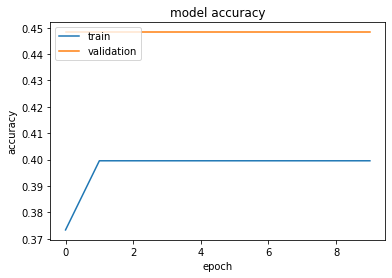

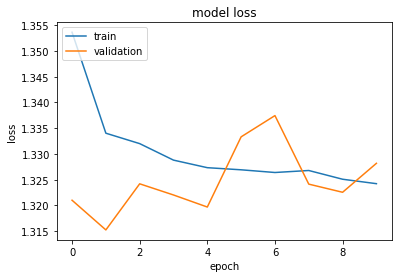

[<tf.Variable 'dense_769455/kernel:0' shape=(2, 100) dtype=float32, numpy=
array([[-0.02998047, -0.00346257,  0.14210612, -0.02375685,  0.16065641,
        -0.06523215, -0.20117833,  0.03013614, -0.27601188, -0.08346175,
         0.1477949 , -0.05692826, -0.10067314, -0.01904339, -0.12103644,
         0.08134425,  0.10843224, -0.04728403, -0.00493289,  0.2521961 ,
        -0.05153223, -0.00048869, -0.12507348, -0.00717679,  0.03241867,
         0.16629669, -0.23202172, -0.2128674 ,  0.17206183, -0.01493018,
        -0.12537676,  0.14092879,  0.05180335,  0.06711178,  0.14648381,
         0.18861295, -0.04481851,  0.11893614, -0.16698071,  0.03678221,
         0.05734446, -0.09106558,  0.05279708,  0.25594336,  0.25302377,
        -0.03072667, -0.03397683,  0.12493257,  0.01518024,  0.13637176,
         0.263854  ,  0.19053753,  0.11584937, -0.20709349, -0.3213395 ,
         0.02456648,  0.14070258, -0.2412757 ,  0.04799358, -0.11821213,
         0.04552273,  0.10835481, -0.11835481, -0

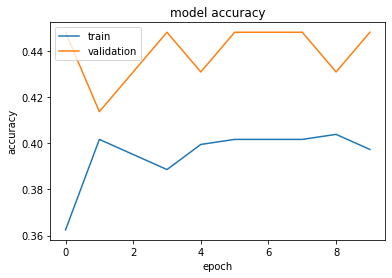

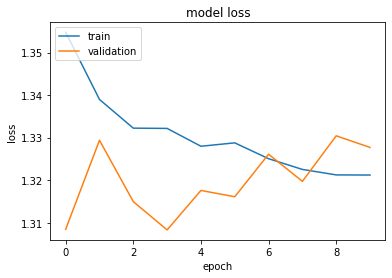

[<tf.Variable 'dense_769491/kernel:0' shape=(3, 100) dtype=float32, numpy=
array([[-2.93743294e-02, -6.60941610e-03,  1.38284296e-01,
        -2.51282286e-02,  1.59440413e-01, -8.30655843e-02,
        -2.08700866e-01,  1.58237778e-02, -2.77898997e-01,
        -8.19783956e-02,  1.51790097e-01, -5.12578972e-02,
        -1.09118775e-01, -2.29122769e-02, -1.29475921e-01,
         7.98776448e-02,  9.84648541e-02, -6.18721582e-02,
         3.29410844e-03,  2.44049683e-01, -4.28287126e-02,
         2.70000994e-02, -1.23962440e-01, -2.86250515e-03,
         4.42666709e-02,  1.68011650e-01, -2.39608154e-01,
        -2.09326252e-01,  1.61909759e-01, -1.93302091e-02,
        -1.08049154e-01,  1.31566063e-01,  4.83654998e-02,
         5.31569384e-02,  1.37314588e-01,  1.84669837e-01,
        -4.22834717e-02,  1.26514032e-01, -1.75410792e-01,
         2.87695788e-02,  4.96140532e-02, -8.27197656e-02,
         3.88861224e-02,  2.38075390e-01,  2.46110782e-01,
        -2.31545698e-02, -4.14144434e-02

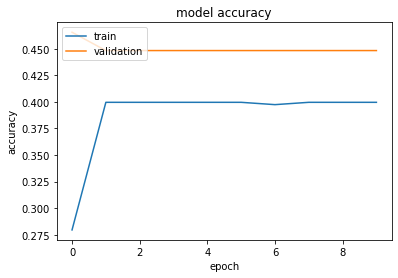

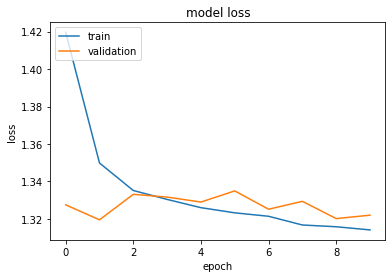

[<tf.Variable 'dense_769523/kernel:0' shape=(4, 100) dtype=float32, numpy=
array([[-0.00103115, -0.01867905,  0.15025358, -0.03857091,  0.1536287 ,
        -0.07825238, -0.20946337,  0.00659283, -0.27952024, -0.06609651,
         0.17710184, -0.06538821, -0.11280857, -0.01413172, -0.13788459,
         0.05959162,  0.1252541 , -0.07417436,  0.02640318,  0.22778845,
        -0.03592496,  0.04032217, -0.11429925, -0.01100125,  0.05145316,
         0.1697074 , -0.232253  , -0.2172952 ,  0.16646744, -0.01905127,
        -0.09848164,  0.13202971,  0.04751449,  0.02290797,  0.14626591,
         0.1764953 , -0.0374397 ,  0.08683708, -0.17961983,  0.04676189,
         0.05187847, -0.08649438,  0.03849485,  0.22832292,  0.25257164,
        -0.02186016, -0.04818007,  0.1539839 ,  0.02462726,  0.16340859,
         0.25286046,  0.19094826,  0.10943823, -0.23035449, -0.32296893,
         0.02767603,  0.16153356, -0.2544226 ,  0.02644967, -0.13245746,
         0.05105891,  0.11990935, -0.13734084, -0

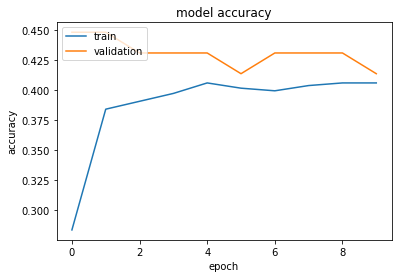

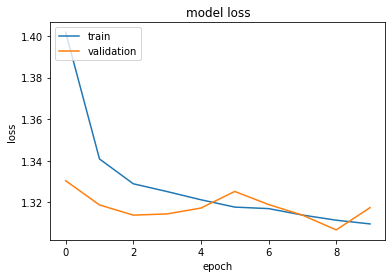

[<tf.Variable 'dense_769551/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[ 9.91497375e-03, -3.84061821e-02,  1.46123961e-01,
        -3.58619764e-02,  1.61838815e-01, -9.23385546e-02,
        -2.22152606e-01,  1.80860274e-02, -2.88089335e-01,
        -6.44339696e-02,  1.84023947e-01, -6.35254085e-02,
        -9.18869227e-02, -1.33917322e-02, -1.43251106e-01,
         6.86012954e-02,  1.26444355e-01, -9.43800583e-02,
         8.43869615e-03,  2.17895254e-01, -1.86321996e-02,
         4.58990335e-02, -1.15109876e-01, -7.77536863e-03,
         6.06692359e-02,  1.80991173e-01, -2.41551951e-01,
        -2.16336787e-01,  1.70597211e-01, -3.77580225e-02,
        -9.17589590e-02,  1.22947864e-01,  3.04099843e-02,
         2.13998519e-02,  1.38437897e-01,  1.66734979e-01,
        -3.53973322e-02,  9.96519998e-02, -1.74224272e-01,
         6.16795607e-02,  6.32076189e-02, -8.66760686e-02,
         2.70164590e-02,  2.46251523e-01,  2.49005362e-01,
        -1.08213359e-02, -3.58349718e-02

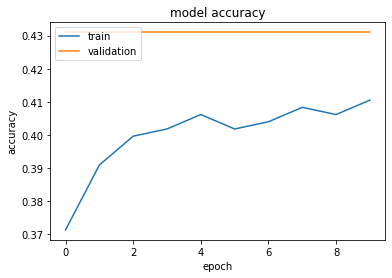

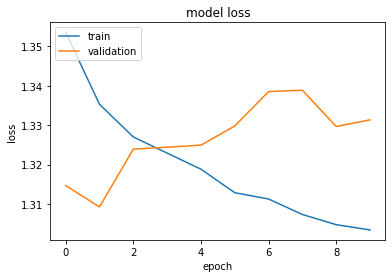

[<tf.Variable 'dense_769575/kernel:0' shape=(6, 100) dtype=float32, numpy=
array([[-0.01454014, -0.04346533,  0.11791498, -0.04597746,  0.16800053,
        -0.08634315, -0.22325936,  0.02227541, -0.2968792 , -0.05244134,
         0.17952599, -0.05769492, -0.10146054,  0.00726775, -0.17123652,
         0.04890198,  0.12773168, -0.09131391,  0.00155781,  0.21592672,
        -0.02198608,  0.02651211, -0.10169741, -0.00770955,  0.07126054,
         0.18302137, -0.23258989, -0.22028184,  0.19360468, -0.02219618,
        -0.09054689,  0.1229291 ,  0.03370153,  0.01363596,  0.14571095,
         0.180196  , -0.04993617,  0.10365508, -0.18848574,  0.06264085,
         0.05750379, -0.0811318 ,  0.01772694,  0.24544288,  0.2440017 ,
         0.00622632, -0.04111066,  0.16886795,  0.0176678 ,  0.16014484,
         0.25548863,  0.18518196,  0.09442659, -0.21608245, -0.32380763,
         0.03694216,  0.15992288, -0.2528603 , -0.00518979, -0.11832541,
         0.03834933,  0.12579939, -0.13928263, -0

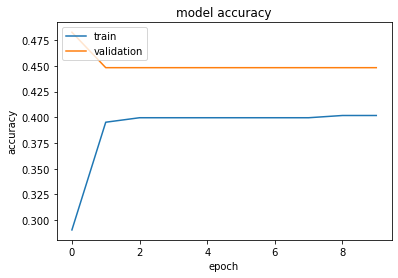

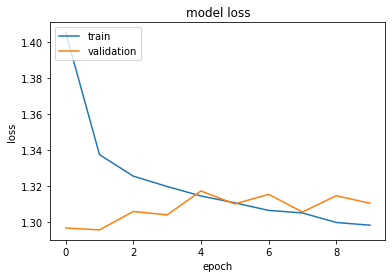

[<tf.Variable 'dense_769595/kernel:0' shape=(7, 100) dtype=float32, numpy=
array([[-0.01184806, -0.04374328,  0.08181024, -0.04564314,  0.17895463,
        -0.0820545 , -0.23246881,  0.01642509, -0.297735  , -0.05395869,
         0.16921294, -0.05407927, -0.09682662, -0.017919  , -0.16781509,
         0.06358481,  0.10491202, -0.08691359,  0.00808497,  0.23442207,
        -0.00444825,  0.02239645, -0.09769099, -0.00673742,  0.06905017,
         0.20283978, -0.22997631, -0.20771408,  0.18981141, -0.03099008,
        -0.0924077 ,  0.1283137 ,  0.03003569,  0.01849045,  0.13548498,
         0.19890857, -0.05368961,  0.1093112 , -0.18596388,  0.09878042,
         0.04917692, -0.06008846, -0.01094053,  0.24290328,  0.23230994,
         0.03441398, -0.03799856,  0.17226017,  0.01827496,  0.16609289,
         0.2507794 ,  0.17738955,  0.09965746, -0.21637371, -0.31684133,
         0.04496333,  0.15446068, -0.24380073, -0.00844312, -0.10766145,
         0.03024464,  0.12056831, -0.15228385, -0

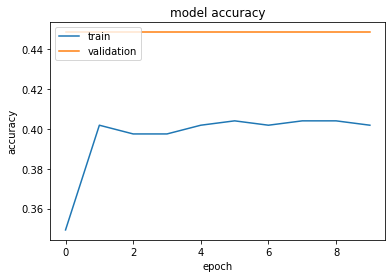

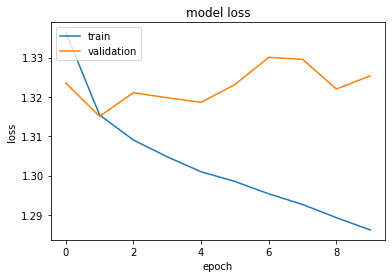

[<tf.Variable 'dense_769611/kernel:0' shape=(8, 100) dtype=float32, numpy=
array([[-0.0140628 , -0.0408312 ,  0.07413908, -0.03314296,  0.17883644,
        -0.07810545, -0.22163069,  0.02204322, -0.30117258, -0.04354557,
         0.16557959, -0.06620696, -0.09562215, -0.02566193, -0.18025771,
         0.06565534,  0.1015433 , -0.09411667, -0.00197683,  0.22280851,
        -0.00607614,  0.02348238, -0.09466194, -0.01106116,  0.04869705,
         0.20662346, -0.22558247, -0.20569499,  0.19430652, -0.02453148,
        -0.08630355,  0.13714984,  0.01868087,  0.0140952 ,  0.12830377,
         0.1897446 , -0.04927804,  0.12588024, -0.19044594,  0.1184999 ,
         0.0405596 , -0.06920493, -0.02462664,  0.24623972,  0.24074247,
         0.03984683, -0.03037389,  0.1806503 ,  0.01646072,  0.1762012 ,
         0.2443202 ,  0.19040912,  0.09322892, -0.21996802, -0.31576425,
         0.05493661,  0.13683055, -0.23887219, -0.02294586, -0.10583176,
         0.01534157,  0.124051  , -0.15205105, -0

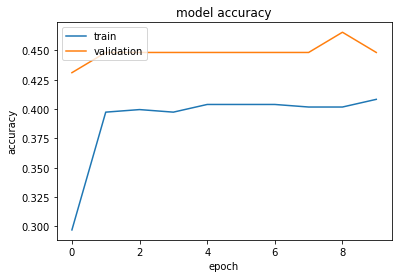

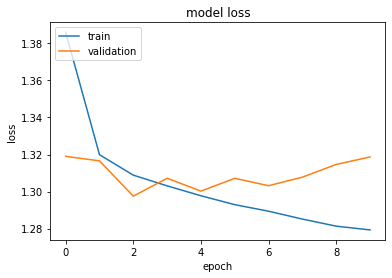

[<tf.Variable 'dense_769623/kernel:0' shape=(9, 100) dtype=float32, numpy=
array([[-2.75646765e-02, -6.26444370e-02,  4.11650017e-02,
        -3.73578444e-02,  2.02800602e-01, -7.93160349e-02,
        -2.18853578e-01,  2.75663100e-02, -3.03169161e-01,
        -3.30659263e-02,  1.56128496e-01, -5.95631078e-02,
        -9.78309140e-02, -1.91036277e-02, -1.80734739e-01,
         5.83853126e-02,  9.51312631e-02, -8.12687874e-02,
         1.44329658e-02,  2.14330748e-01, -7.53101951e-04,
         2.25459132e-03, -8.67753625e-02, -1.70770623e-02,
         4.17834967e-02,  2.04906836e-01, -2.30315581e-01,
        -2.02762008e-01,  2.04471916e-01, -3.14005651e-02,
        -1.01061709e-01,  1.52264655e-01,  1.98382456e-02,
         2.48371139e-02,  1.32225335e-01,  1.97199523e-01,
        -4.82461862e-02,  1.22696221e-01, -1.86081871e-01,
         1.20546013e-01,  4.88562807e-02, -7.81667531e-02,
        -2.07778029e-02,  2.39138797e-01,  2.34653533e-01,
         2.92963795e-02, -2.70151235e-02

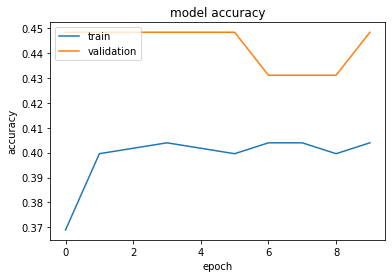

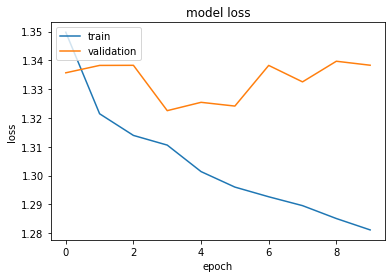

[<tf.Variable 'dense_769631/kernel:0' shape=(10, 100) dtype=float32, numpy=
array([[-0.00483749, -0.04914984,  0.03838982, -0.04995195,  0.20549943,
        -0.09726405, -0.21000008,  0.01959253, -0.29863513, -0.03112227,
         0.16492832, -0.05696125, -0.09911575, -0.01969259, -0.18171312,
         0.0708766 ,  0.10009278, -0.08270004,  0.02298663,  0.21098036,
        -0.01480111,  0.02125944, -0.10863619, -0.03319249,  0.04299253,
         0.20432648, -0.23626122, -0.19973235,  0.20454745, -0.00721044,
        -0.09772298,  0.15632917,  0.00907992,  0.02421977,  0.1425808 ,
         0.20031536, -0.0602309 ,  0.12975407, -0.19508137,  0.10734823,
         0.05904118, -0.10102526, -0.02114471,  0.24669407,  0.22195895,
         0.04420809, -0.02931173,  0.17777218,  0.03510503,  0.18048476,
         0.2762028 ,  0.17781085,  0.07636824, -0.2116723 , -0.3145501 ,
         0.02459232,  0.09329119, -0.22802928,  0.01107374, -0.10713252,
         0.03066443,  0.11892037, -0.16577128, -

In [393]:
pca_model_breast = dnpOnPCAComponents(principalComponents_breast_train, y_train, principalComponents_breast_valid, y_valid, principalComponents_breast_test, y_test, subtypes = 4)

### Saving PCA models

In [364]:
pca_model_lung.save("pcaModelLung")
pca_model_breast.save("pcaModelBreast")
pca_model_pros.save("pcaModelProstate")

INFO:tensorflow:Assets written to: pcaModelLung/assets
INFO:tensorflow:Assets written to: pcaModelBreast/assets
INFO:tensorflow:Assets written to: pcaModelProstate/assets


### Evaluate the PCA models

In [391]:
pca_model_lung.evaluate(principalComponents_lung_test, y_test_lung, verbose = 2)

1/1 - 0s - loss: 1.2500 - accuracy: 0.6190 - auc: 0.8231 - f1_m: 0.6190


[1.2500317096710205,
 0.6190476417541504,
 0.8231292963027954,
 0.6190475821495056]

In [394]:
pca_model_pros.evaluate(principalComponents_pros_test, y_test_pros, verbose = 2)

1/1 - 0s - loss: 0.9879 - accuracy: 0.3636 - auc: 0.2149 - f1_m: 0.3636


[0.9878687262535095,
 0.3636363744735718,
 0.21487605571746826,
 0.363636314868927]

In [395]:
pca_model_breast.evaluate(principalComponents_breast_test, y_test, verbose = 2)

2/2 - 0s - loss: 1.4032 - accuracy: 0.3966 - auc: 0.5304 - f1_m: 0.0370


[1.4031678438186646,
 0.3965517282485962,
 0.5303705930709839,
 0.03703703358769417]

### Loading the saved PCA models

In [327]:
reconstructed_pca_model_lung = keras.models.load_model("pcaModelLung", custom_objects={'f1_m':f1_m})
reconstructed_pca_model_Breast = keras.models.load_model("pcaModelBreast", custom_objects={'f1_m':f1_m})
reconstructed_pca_model_Pros = keras.models.load_model("pcaModelProstate", custom_objects={'f1_m':f1_m})

### Comparison with FNN model

In [329]:
## TO-DO
def get_model(inputSize, subtypes):
    
    model = tf.keras.models.Sequential([
        # Add a hidden layer with dropout
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(subtypes, activation="softmax")
    ])
    model.build(inputSize)
    model.summary()

    # Train neural network
    model.compile(
        optimizer="adagrad",
        loss="categorical_crossentropy",
        metrics=["accuracy", "AUC", f1_m]
    )

    return model

### Running Lung, Cancer and Prostate Cancer Datasets on FNN model

Model: "sequential_192198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_768767 (Dense)         (None, 100)               331300    
_________________________________________________________________
dense_768768 (Dense)         (None, 50)                5050      
_________________________________________________________________
dense_768769 (Dense)         (None, 100)               5100      
_________________________________________________________________
dense_768770 (Dense)         (None, 5)                 505       
Total params: 341,955
Trainable params: 341,955
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 2s 156ms/step - loss: 1.6900 - accuracy: 0.4200 - auc: 0.5957 - f1_m: 0.3343 - val_loss: 1.3761 - val_accuracy: 0.6667 - val_auc: 0.7871 - val_f1_m: 0.6667
Epoch 2/50
6/6 [===================

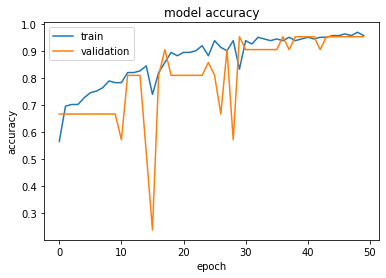

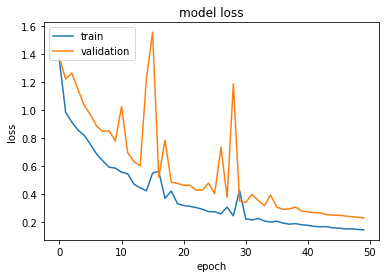

In [354]:
size = x_train_lung.shape[1]
subtypes = 5
fnn_model_lung = get_model((None, size), subtypes)
fnn_model_lung.fit(x_train_lung, y_train_lung, epochs=50, validation_data=(x_valid_lung, y_valid_lung))
plot(fnn_model_lung.history)

Model: "sequential_192195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_768755 (Dense)         (None, 100)               596700    
_________________________________________________________________
dense_768756 (Dense)         (None, 50)                5050      
_________________________________________________________________
dense_768757 (Dense)         (None, 100)               5100      
_________________________________________________________________
dense_768758 (Dense)         (None, 2)                 202       
Total params: 607,052
Trainable params: 607,052
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 2s 350ms/step - loss: 0.9993 - accuracy: 0.5023 - auc: 0.5200 - f1_m: 0.5013 - val_loss: 0.7833 - val_accuracy: 0.6364 - val_auc: 0.5702 - val_f1_m: 0.6364
Epoch 2/50
3/3 [===================

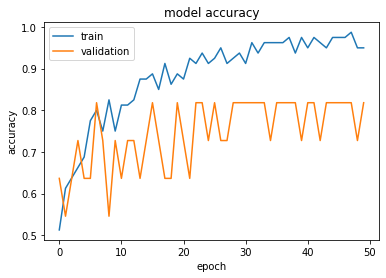

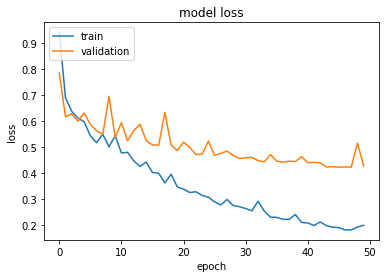

In [348]:
size = x_train_pros.shape[1]
subtypes = 2
fnn_model_pros = get_model((None, size), subtypes)
fnn_model_pros.fit(x_train_pros, y_train_pros, epochs=50, validation_data=(x_valid_pros, y_valid_pros))
plot(fnn_model_pros.history)

Model: "sequential_192196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_768759 (Dense)         (None, 100)               152000    
_________________________________________________________________
dense_768760 (Dense)         (None, 50)                5050      
_________________________________________________________________
dense_768761 (Dense)         (None, 100)               5100      
_________________________________________________________________
dense_768762 (Dense)         (None, 4)                 404       
Total params: 162,554
Trainable params: 162,554
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
15/15 [==============================] - 2s 58ms/step - loss: 1.2211 - accuracy: 0.4437 - auc: 0.7221 - f1_m: 0.1165 - val_loss: 1.0690 - val_accuracy: 0.5862 - val_auc: 0.8420 - val_f1_m: 0.1590
Epoch 2/50
15/15 [================

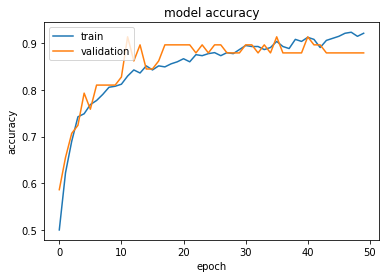

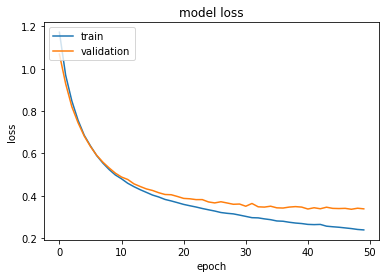

In [349]:
size = x_train.shape[1]
subtypes = 4
fnn_model_breast = get_model((None, size), subtypes)
fnn_model_breast.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))
plot(fnn_model_breast.history)

### Saving the FNN models

In [360]:
fnn_model_lung.save("fnnModelLung")
fnn_model_breast.save("fnnModelBreast")
fnn_model_pros.save("fnnModelProstate")

INFO:tensorflow:Assets written to: fnnModelLung/assets
INFO:tensorflow:Assets written to: fnnModelBreast/assets
INFO:tensorflow:Assets written to: fnnModelProstate/assets


### Evaluating FNN models

In [361]:
fnn_model_breast.evaluate(x_test, y_test, verbose=2)
fnn_model_lung.evaluate(x_test_lung, y_test_lung, verbose=2)
fnn_model_pros.evaluate(x_test_pros, y_test_pros, verbose=2)

2/2 - 0s - loss: 0.5101 - accuracy: 0.8621 - auc: 0.9464 - f1_m: 0.8606
1/1 - 0s - loss: 0.3754 - accuracy: 0.8571 - auc: 0.9870 - f1_m: 0.8571
1/1 - 0s - loss: 0.2129 - accuracy: 0.9091 - auc: 0.9752 - f1_m: 0.9091


[0.21293053030967712,
 0.9090909361839294,
 0.9752066135406494,
 0.9090908765792847]

### Loading the FNN models

In [362]:
reconstructed_fnn_model_lung = keras.models.load_model("fnnModelLung", custom_objects={'f1_m':f1_m})
reconstructed_fnn_model_breast = keras.models.load_model("fnnModelBreast", custom_objects={'f1_m':f1_m})
reconstructed_fnn_model_pros = keras.models.load_model("fnnModelProstate", custom_objects={'f1_m':f1_m})

### Compaing my model with 2-D CNN model

In [47]:
## TO-DO